# ZADÁNÍ [TODO - ODSTRANIT]
## 1. část
### Proveďte explorativní analýzu zvolené datové sady
Pro každý následující bod implementujte odpovídající sekci ve zdrojovém kódu a zjištěné výsledky popište v dokumentaci:
- prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají 
    - počet hodnot, 
    - nejčastější hodnoty, 
    - rozsah hodnot atd.
- prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů
    - zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. 
    - do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. 
        - bodový graf, 
        - histogram, 
        - krabicový nebo houslový graf, 
        - graf složený z více podgrafů apod. 
    - věnujte se různým atributům
    - v dokumentaci také všechny grafy vhodně okomentujte – popište, jaké informace z nich můžeme vyčíst
- zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty
    - v dokumentaci popište, jakým způsobem jste odlehlé hodnoty detekovali, 
    - a jaké hodnoty jste objevili
- proveďte podrobnou analýzu chybějící hodnot. 
    - v dokumentaci popište celkový počet chybějících hodnot, 
    - počet objektů s více chybějícími hodnotami atd.
- proveďte korelační analýzu numerických atributů 
    - k analýze využijte grafy
    - i korelační koeficienty

## 2. část
V rámci přípravy datové sady proveďte následující kroky:
- z datové sady odstraňte atributy, které jsou pro danou dolovací úlohu irelevantní
- v datové sadě, pokud možno, ponechte:
    - kategorické,
    - numerické atributy, 
    - atributy s chybějícími hodnotami a 
    - atributy s odlehlými hodnotami (pokud je původní datová sada obsahuje)
- vypořádejte se s chybějícími hodnotami. 
    - pro odstranění těchto hodnot využijte alespoň dvě různé metody pro odstranění chybějících hodnot
- vypořádejte se s odlehlými hodnotami, jsou-li v datové sadě přítomny
### Připravte 2 varianty datové sady vhodné pro dolovací algoritmy
- můžete uvažovat dolovací úlohu uvedenou u datové sady nebo navrhnout vlastní dolovací úlohy
- v případě vlastní dolovací úlohy ji specifikujte v dokumentaci
- pro jednu variantu datové sady proveďte diskretizaci numerických atributů tak, aby výsledná datová sada byla vhodná pro algoritmy, které vyžadují na vstupu kategorické atributy.
- pro druhou variantu datové sady proveďte vhodnou transformaci kategorických atributů na numerické atributy. Dále pak proveďte normalizaci numerických atributů, které má smysl normalizovat. Výsledná datová sada by měla být vhodná pro metody vyžadující numerické vstupy.


In [1]:
# Import modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

In [73]:
# Load the dataset to pandas dataframe df
file = "students_mental_health_survey.csv"
df = pd.read_csv(file)
# print(df)

## Explorativní analýza

Pro zvolenou datovou sadu byla nejdříve provedena explorativní analýza, kde byly analyzovány jednotlivé atributy, které datová sada obsahuje, a hodnoty, kterých tyto atributy nabývají. Následující podkapitoly...

In [3]:
# Get info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

Popisná statistika pro numerické sloupce datové sady.

#### Atributy a jejich hodnoty

prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)

+ spojíme s
prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů (druhá část v násedující podkapitole - rozložení a ovlivnění více atributů)

Z dataset zdroje - jednotlive atributy (https://www.kaggle.com/datasets/sonia22222/students-mental-health-assessments/data) + domyslene

- Age: Věk studenta  
- Course: Obor studia  
- Gender: Pohlaví studenta  
- CGPA: Akademický průměr známek  
- Stress_Level: Úroveň stresu, který student zažívá  
- Depression_Score: Skóre vyjadřující úroveň deprese, kterou student zažívá  
- Anxiety_Score: Skóre vyjadřující úroveň úzkosti, kterou student zažívá  
- Sleep_Quality: Kvalita spánku studenta  
- Physical_Activity: Úroveň fyzické aktivity studenta  
- Diet_Quality (Kvalita stravy): Kvalita stravy studenta  
- Social_Support : Úroveň sociální podpory, které se studentovi dostává  
- Relationship_Status: Rodinný status studenta  
- Substance_Use: Frekvence užívání návykových látek, jako je alkohol, cigarety nebo jiné drogy  
- Counseling_Service_Use: Frekvence navštěvování odborného poradenství  
- Family_History: Zda má student v rodinné anamnéze problémy s duševním zdravím  
- Chronic_Illness: Zda má student chronické problémy  
- Financial_Stress: Úroveň finančního stresu, který student zažívá  
- Extracurricular_Involvement: Zapojování se do mimoškolní činnosti  
- Semester_Credit_Load: Počet kreditů, které student v daném semestru absolvuje  
- Residence_Type: Typ bydliště studenta  


Datová sada obsahuje atributy s následujícími hodnotami. 

Předzpracování:

In [4]:
kvantitative_attributes = ['Age', 'CGPA', 'Semester_Credit_Load']
categorical_attributes = []

unique_values_array = []  # Initialize an empty array to store unique values

# Iterate over columns
for col in df.columns:
    unique_values = df[col].unique()
    unique_values_array.append((col, unique_values))

sorted_unique_values_array = []
for col, values in unique_values_array:
    if col in kvantitative_attributes:
        min_val, max_val = df[col].min(), df[col].max()
        interval = f"{min_val} - {max_val}"
        sorted_values = [interval]
    else:
        # prevent nan
        sorted_values = sorted(values, key=lambda x: ('' if pd.isna(x) else str(x)))
        # save the attribute to cathegorical
        categorical_attributes.append(col)
    sorted_unique_values_array.append((col, sorted_values))


Vypis vcetne grafu pro vsechny atributy, nejdriv kategoricke, potom numericke

Datová sada obsahuje 20 atributů, z nichž 3 atributy by se daly zařadit mezi kvantitativní a zbývajících 17 atributů je kategorických. Jednotlivé kategorické atributy nabývají následujících hodnot:

In [5]:
# Print the attributes and their values for the excluded columns
for col, values in sorted_unique_values_array:
    if col in categorical_attributes:
        print(f"{col}: [{', '.join(map(str, values))}]")

Course: [Business, Computer Science, Engineering, Law, Medical, Others]
Gender: [Female, Male]
Stress_Level: [0, 1, 2, 3, 4, 5]
Depression_Score: [0, 1, 2, 3, 4, 5]
Anxiety_Score: [0, 1, 2, 3, 4, 5]
Sleep_Quality: [Average, Good, Poor]
Physical_Activity: [High, Low, Moderate]
Diet_Quality: [Average, Good, Poor]
Social_Support: [High, Low, Moderate]
Relationship_Status: [In a Relationship, Married, Single]
Substance_Use: [nan, Frequently, Never, Occasionally]
Counseling_Service_Use: [Frequently, Never, Occasionally]
Family_History: [No, Yes]
Chronic_Illness: [No, Yes]
Financial_Stress: [0, 1, 2, 3, 4, 5]
Extracurricular_Involvement: [High, Low, Moderate]
Residence_Type: [Off-Campus, On-Campus, With Family]


Rozsah hodnot jednotlivých kvantitativních atributů, které zvolená datová sada obsahuje, je následující:

In [6]:
# Print the attributes and their values for the excluded columns
for col, values in sorted_unique_values_array:
    if col in kvantitative_attributes:
        print(f"{col}: {', '.join(map(str, values))}")

Age: 18 - 35
CGPA: 2.44 - 4.0
Semester_Credit_Load: 15 - 29


Z histogramů jednotlivých kategorických atributů je možné vidět, jaká je četnost jednotlivých hodnot pro dané atributy.

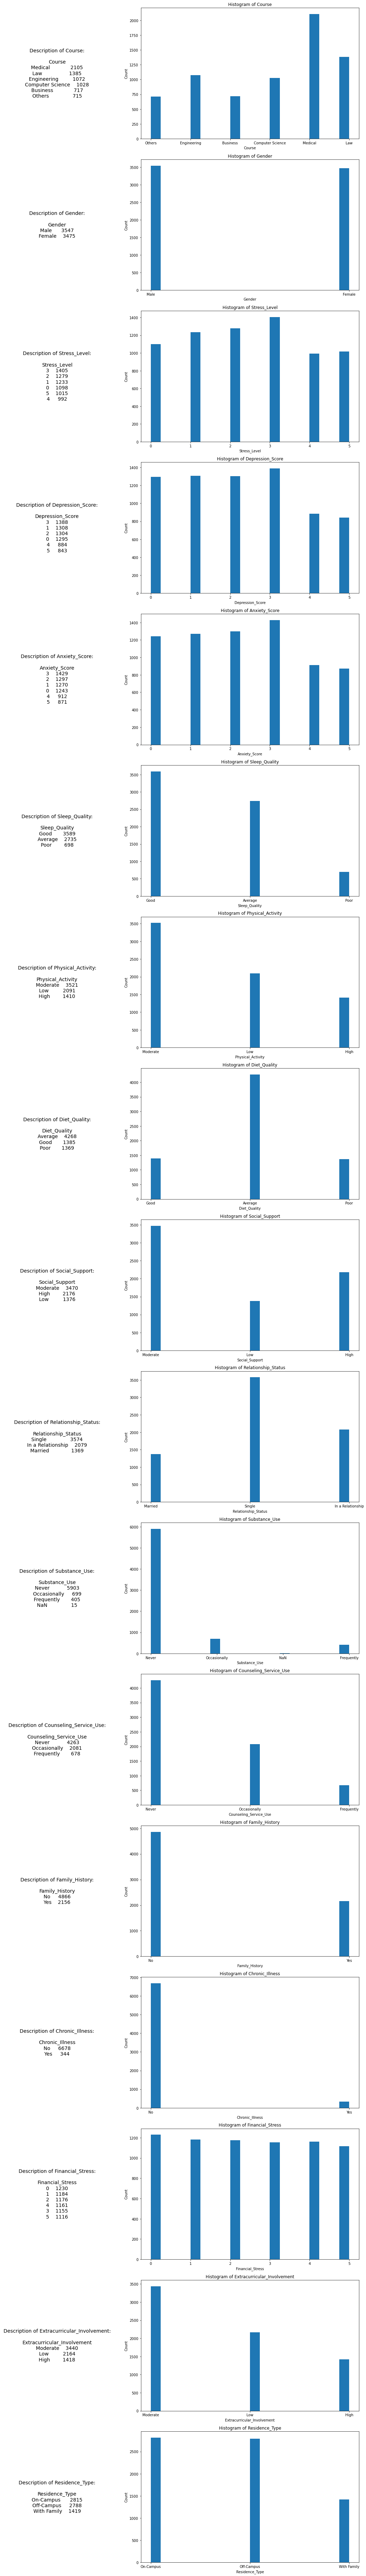

In [7]:
num_cols = 2
num_rows = len(categorical_attributes)

df_with_nan_string = df.map(lambda x: 'NaN' if pd.isna(x) else x)

# Create a 1x2 grid
fig = plt.figure(figsize=(15, 6*len(categorical_attributes)))
gs = gridspec.GridSpec(len(categorical_attributes), 2, width_ratios=[1, 2])

# Iterate over the columns to plot
for i, col in enumerate(categorical_attributes):
    description = df_with_nan_string[col].value_counts().to_string()
    string_title = f"Description of {col}:\n\n" + description
    ax0 = plt.subplot(gs[i, 0])
    ax0.text(0.5, 0.5, string_title, 
             horizontalalignment='center', verticalalignment='center', fontsize=14)
    ax0.axis('off')  # Turn off the axis
    
    # Plot histogram in the second column
    ax1 = plt.subplot(gs[i, 1])
    ax1.set_title(f'Histogram of {col}')
    ax1.hist(df_with_nan_string[col], bins=20, alpha=1)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Count')
    # plt.yscale('log')

# Adjust layout
plt.tight_layout()
plt.show()


Z histogramu pro parametr "Course" lze vyčíst, že jsou v datové sadě zastoupeni nejvíce studenti z lékařských oborů ("Medical"). Druhé největší zastoupení mají studenti práv ("Law") a následně technických oborů ("Engineering"). Co se týče pohlaví, v datové sadě je zastoupen téměř stejný počet mužů jako žen (mužů je o 72 více než žen). Z hodnot levelu stresu, levelu deprese a levelu úzkosti je zastoupen nejvíce level 3 pro všechny tyto atributy a poté převažují hodnoty nižší než 3. Většina studentů hodnotí svoji kvalitu spánku jako dobrou, o něco méně z nich ji kvalitní jako průměrnou a pouze malé množství ji hodnotí jako nekvalitní. U fyzické aktivity také převažuje úroveň mírná ("Moderate"), a podobně nejvíce převažující kvalita stravy studentů je průměrná ("Average"). Většina studentů má průměrnou ("Moderate") sociální podporu a většina je nezadaná. U užívání návykových látek jednoznačně převažuje odpověď "Never" (nikdy), stejně jako u návštěvy odborného poradenství. Problémy s duševním zdravím má v anamnéze asi přibližně jedna třetina dotazovaných studentů a naprostá většina studentů nemá žádné chronické onemocnění. Co se týče atributu finančního stresu, všechny úrovně jsou zastoupeny podobně, o něco málo ale převažuje úroveň 0 a se zvyšující se úrovní finančního stresu četnost ubývá. Do mimoškolních aktivit se mírně ("Moderate") zapojuje asi jedna polovina studentů, dvě jedna třetina studentů se zapojuje pouze málo a zbývající studenti se mimoškolních aktivit účastní často. Množství studentů bydlících v kampusu nebo mimo kampus, ale imo rodinu, jsou asi čtyři pětiny, zatímco poslední pětina studentů bydlí s rodinou.  


Pro kvantitativní atributy byly zjištěny následující popisné charakteristiky a odpovídající histogramy:

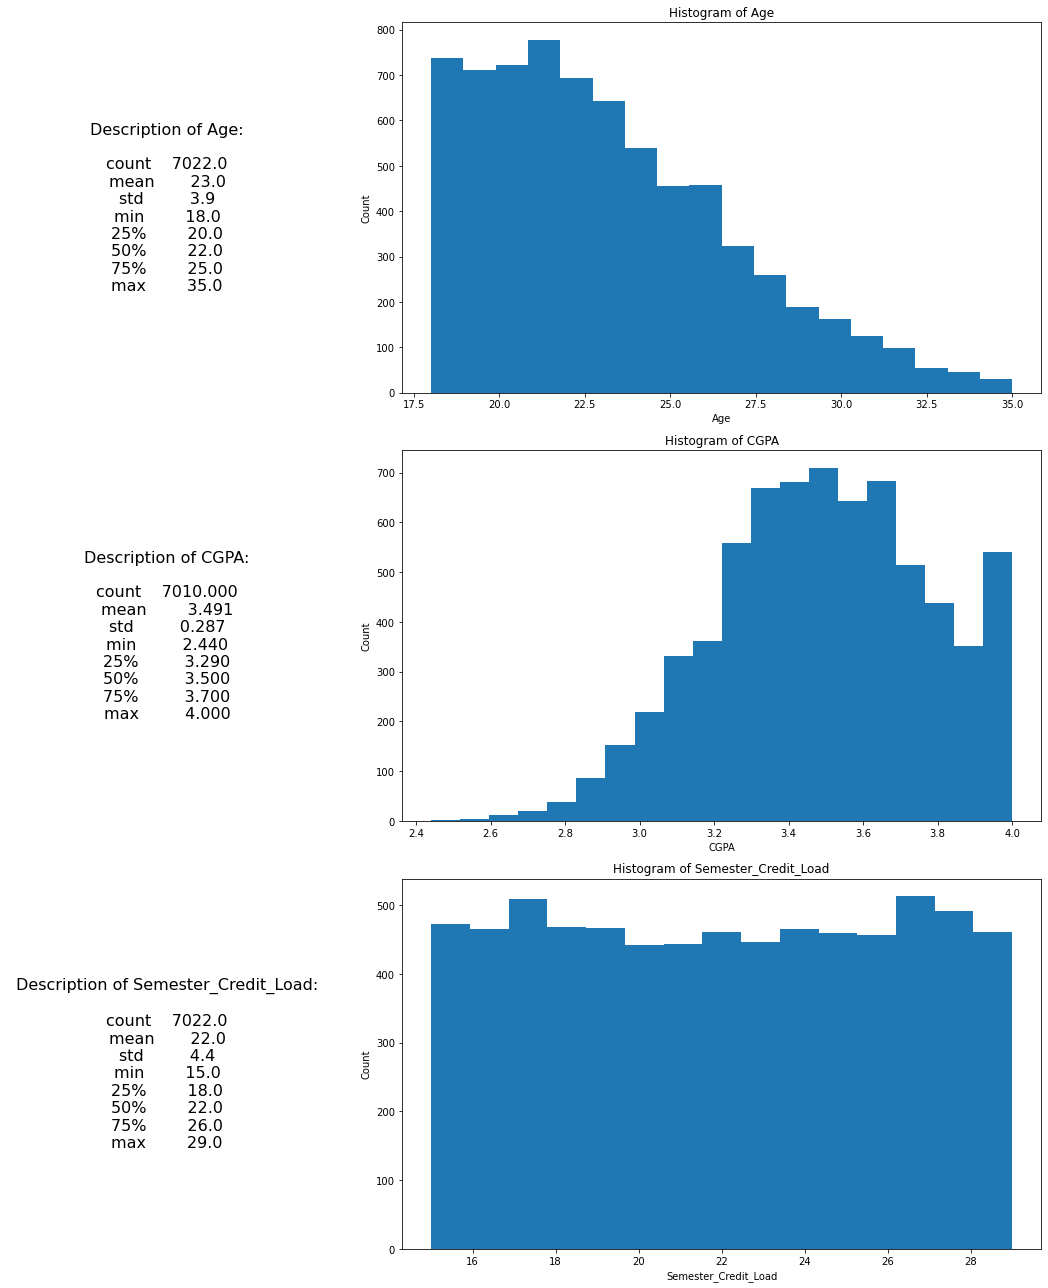

In [8]:
num_cols = 2
num_rows = len(kvantitative_attributes)

# Create a 1x2 grid
fig = plt.figure(figsize=(15, 6*len(kvantitative_attributes)))
gs = gridspec.GridSpec(len(kvantitative_attributes), 2, width_ratios=[1, 2])

# Iterate over the columns to plot
for i, col in enumerate(kvantitative_attributes):
    if col == 'CGPA':
        description = df[col].describe().round(3)
        linspace = 20
    else: 
        linspace = df[col].max()-df[col].min()+1
        description = df[col].describe().round(1)
        
    # Plot description in the first column
    string_title = f"Description of {col}:\n\n" + description.to_string()
    ax0 = plt.subplot(gs[i, 0])
    ax0.text(0.5, 0.5, string_title, 
             horizontalalignment='center', verticalalignment='center', fontsize=16)
    ax0.axis('off')  # Turn off the axis
    
    # Plot histogram in the second column
    ax1 = plt.subplot(gs[i, 1])
    ax1.set_title(f'Histogram of {col}')
    ax1.hist(df[col], bins=linspace, alpha=1)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


Pro atribut "Age" (věk) byla zjištěna průměrná střední hodnota 23 let, přičemž z histogramu je vidět, že jsou data pozitivně vychýlená (průměrná hodnota je vyšší než medián a ten je větší než modus, který odpovídá hodnotě 21). Z měr variability dat můžeme vyčíst směrodatnou odchylku, která je rovna hodnotě 3.9, a rozptyl je tedy roven hodnotě 15.21. Mezikvartilové rozpětí je pak rovno hodnotě 5, což znamená, že mezi hodnotami 20 a 25 se nachází padesát procent všech hodnot.

Atribut "CGPA" je jediným atributem nabývajícím desetinných hodnot v této datové sadě. Nabývá hodnot od 2.44 do hodnoty 4.0, přičemž průměrná hodnota je 3.491 a medián je roven 3.5. Z histogramu i dalších měr polohy je vidět, že data jsou negativně vychýlená. CO se týče měr variability, směrodatná odchylka nabývá hodnoty 0.287 a rozptyl tedy přibližně hodnoty 0.0824. Mezikvartilové rozpětí je 0.41 a apadesát procent dat nabývá hodnoty v intervalu 3.29 až 3.7.

Posledním kvantitativním atributem se "Semester_Credit_Load", tedy počet kreditů na semestr. Tento atribut nabývá hodnot od 15 do 29 a jednotlivá data jsou poměrně rovnoměrně rozdělena. Průměrná hodnota se shoduje s mediánem, nabývají hodnoty 22. Nejvíce zastoupen je počet 27 kreditů za semestr, nicméně pouze o pár záznamů méně nabývá hodnoty 17 kreditů. Z histogramu je vidět přibližně rovnoměrné rozložení dat. Mezikvartilové rozpětí je 8, a padesát procent hodnot leží mezi hodnotou 18 a 26.


### Analýza několika atributů (najednou)

prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.) a věnujte se různým atributům. V dokumentaci také všechny grafy vhodně okomentujte – popište, jaké informace z nich můžeme vyčíst.

Grafy:

pro kategoricke je vhodny jen histogram, pro kvantitativni je mozne pouzit i box plot atd.
dva kategoricke jedine pomoci histogramu kde jsou oba najednou

bodovy graf pro kategoricke dve?

Udelat box plot nebo houslovy graf nebo neco pro nasledujici:
stress level vs CGPA, stress level vs age, stress level vs kredity
depression level
anxiety level


korelace


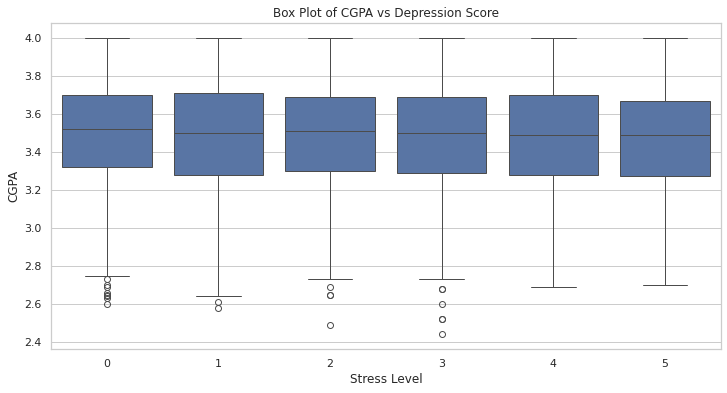

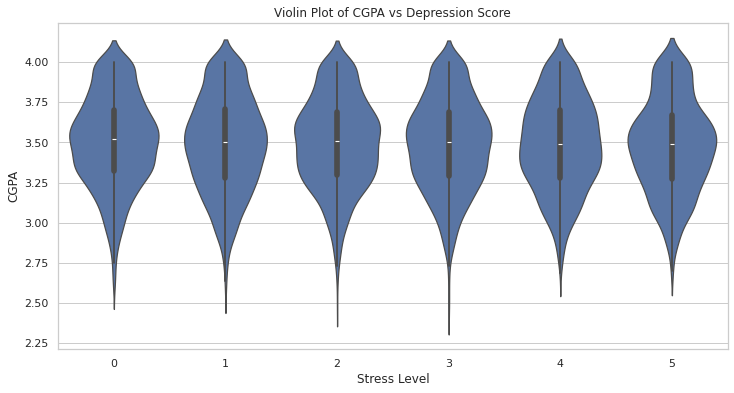

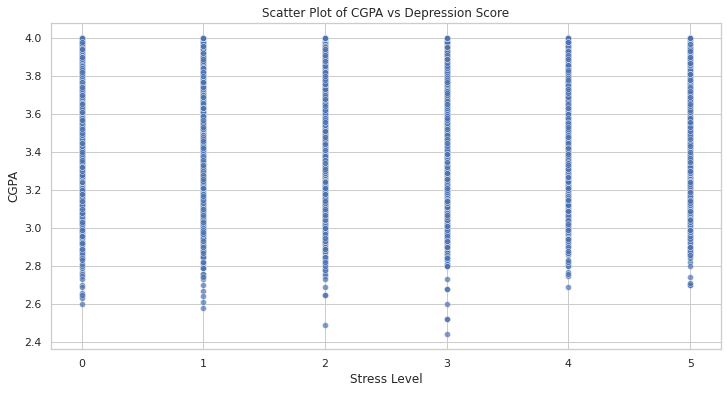

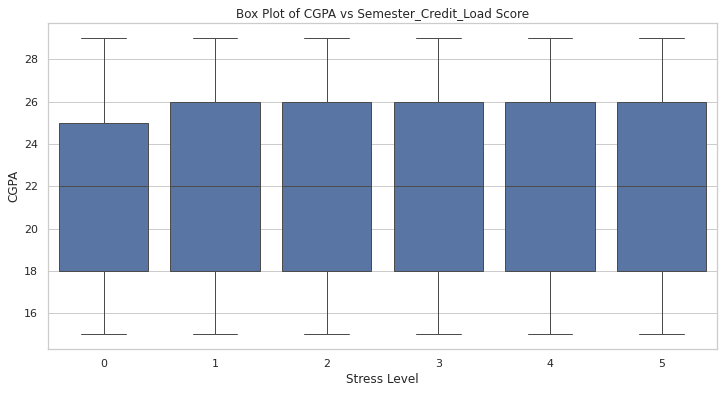

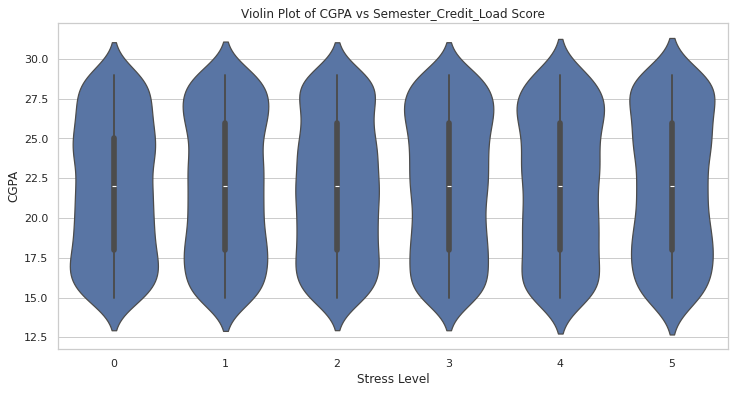

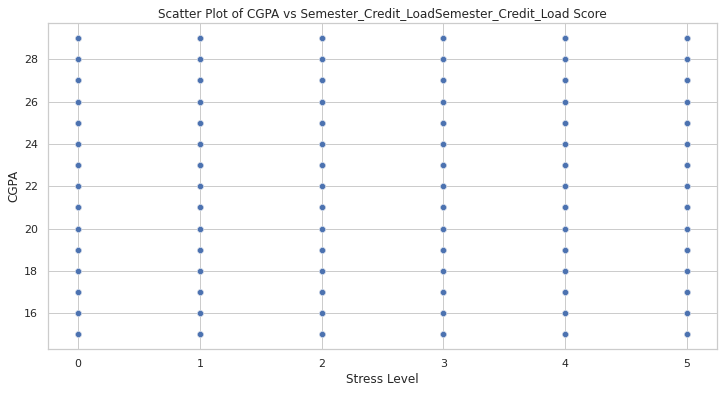

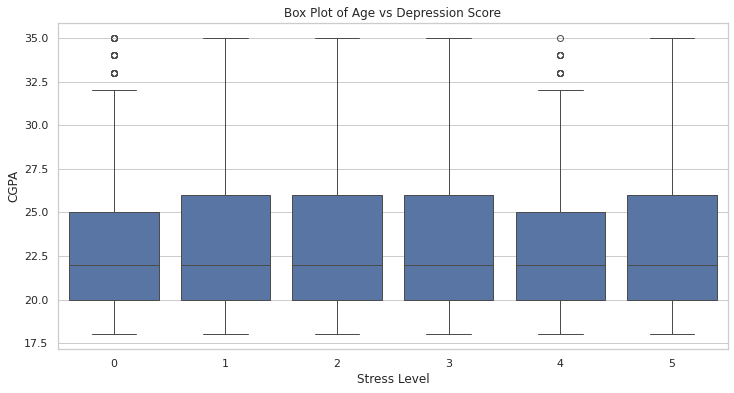

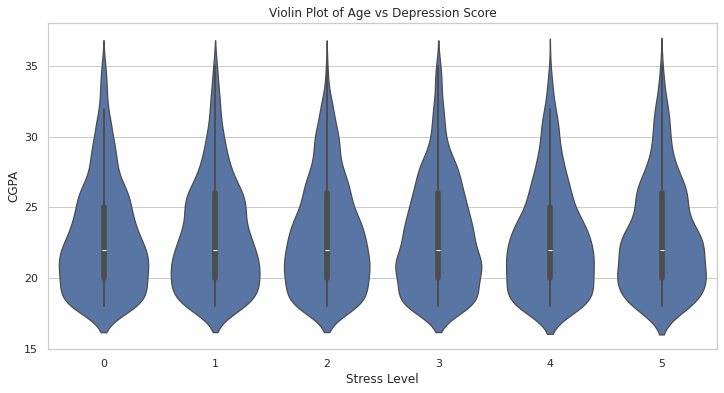

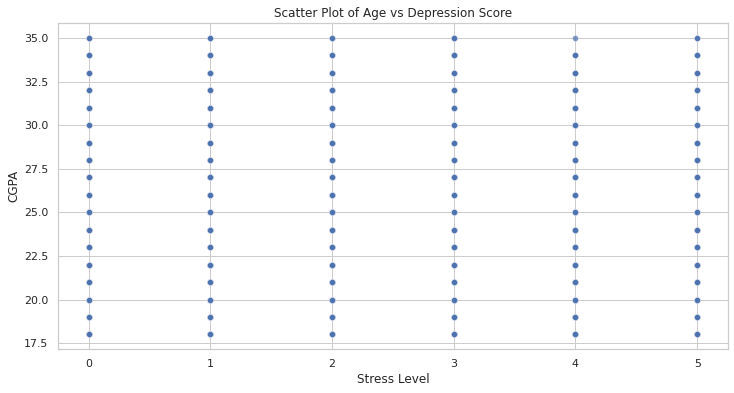

In [9]:
# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Depression_Score', y='CGPA', data=df)
plt.title('Box Plot of CGPA vs Depression Score')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Depression_Score', y='CGPA', data=df)
plt.title('Violin Plot of CGPA vs Depression Score')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()

# Scatter plot (optional)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Depression_Score', y='CGPA', data=df, alpha=0.7)
plt.title('Scatter Plot of CGPA vs Depression Score')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()


# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Depression_Score', y='Semester_Credit_Load', data=df)
plt.title('Box Plot of CGPA vs Semester_Credit_Load Score')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Depression_Score', y='Semester_Credit_Load', data=df)
plt.title('Violin Plot of CGPA vs Semester_Credit_Load Score')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()

# Scatter plot (optional)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Depression_Score', y='Semester_Credit_Load', data=df, alpha=0.7)
plt.title('Scatter Plot of CGPA vs Semester_Credit_LoadSemester_Credit_Load Score')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()


# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Depression_Score', y='Age', data=df)
plt.title('Box Plot of Age vs Depression Score')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Depression_Score', y='Age', data=df)
plt.title('Violin Plot of Age vs Depression Score')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()

# Scatter plot (optional)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Depression_Score', y='Age', data=df, alpha=0.7)
plt.title('Scatter Plot of Age vs Depression Score')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()


<Figure size 864x432 with 0 Axes>

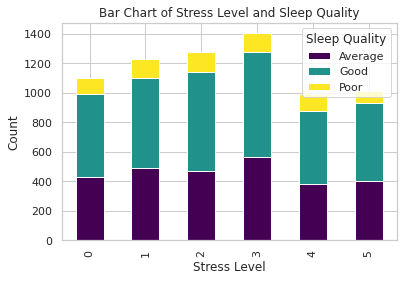

Sleep_Quality


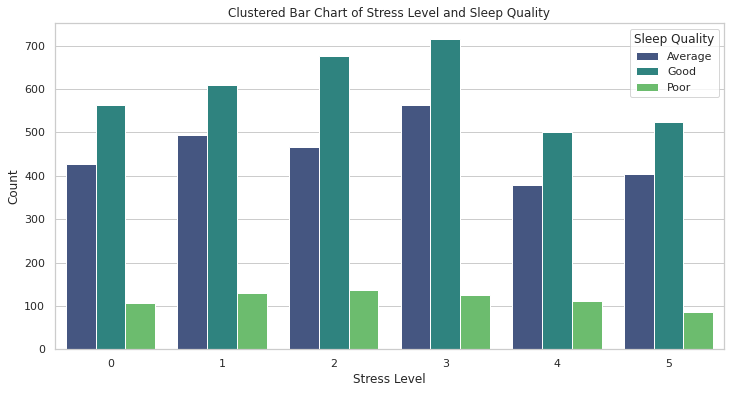

Relationship


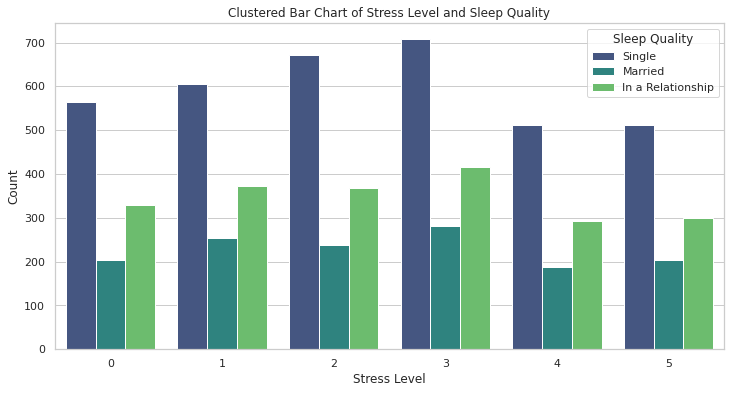

Substance


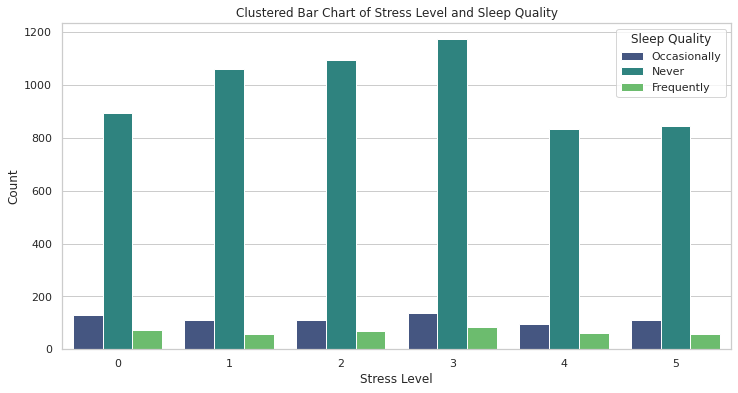

Social Support


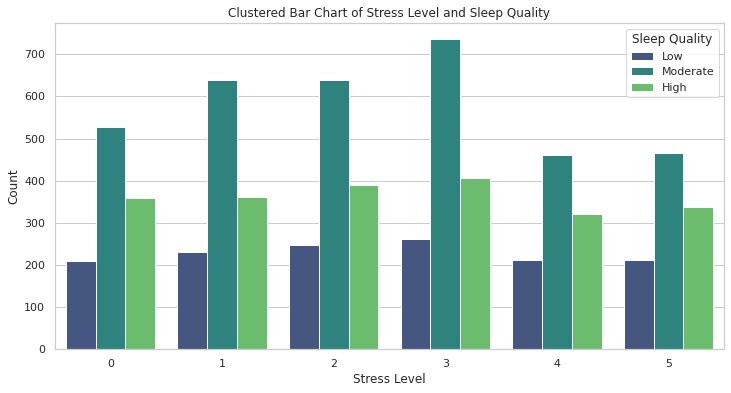

Diet


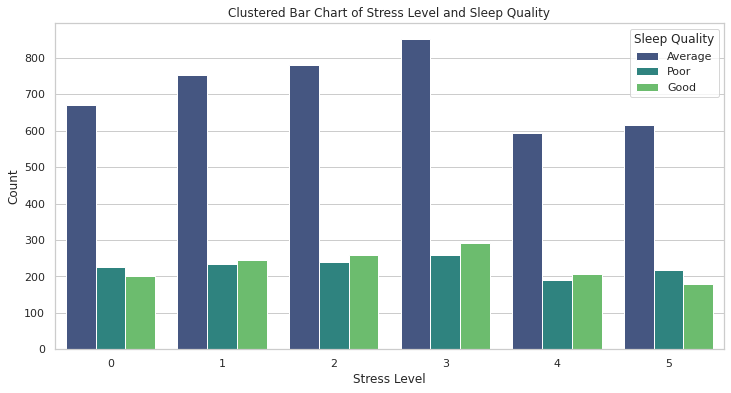

Physical Activity


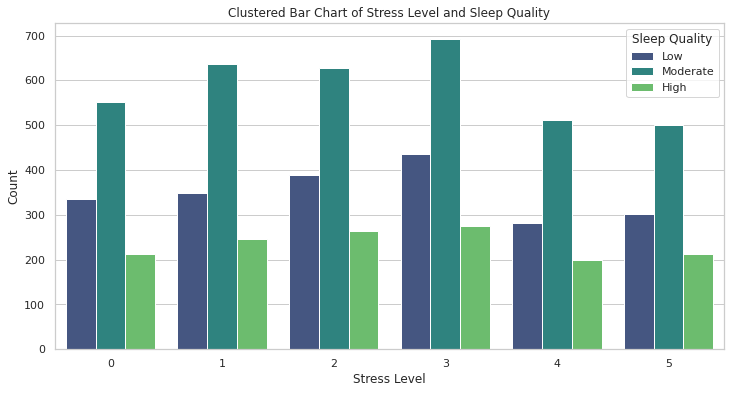

Course


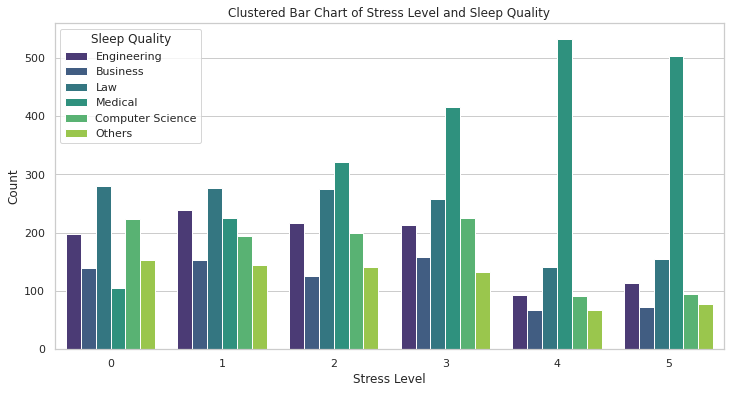

Gender


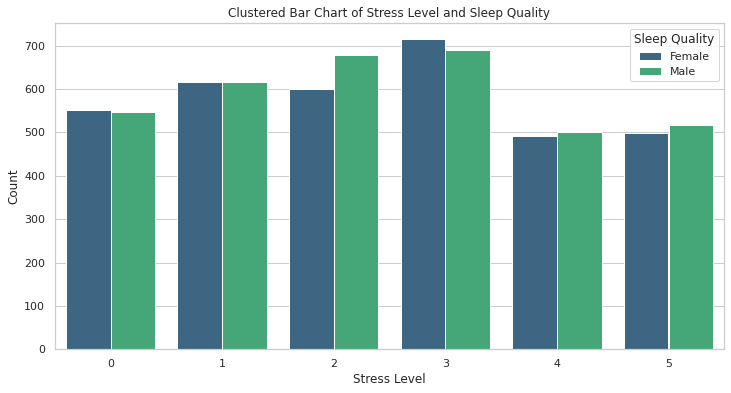

In [10]:
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming the columns you want to plot are 'Stress_Level' and 'Sleep_Quality'

# Create a contingency table
contingency_table = pd.crosstab(df['Stress_Level'], df['Sleep_Quality'])

# Plot a bar chart
plt.figure(figsize=(12, 6))
contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming the columns you want to plot are 'Stress_Level' and 'Sleep_Quality'

# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Sleep_Quality')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Stress_Level', hue='Sleep_Quality', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Relationship')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Stress_Level', hue='Relationship_Status', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()



# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Substance')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Stress_Level', hue='Substance_Use', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()



# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Social Support')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Stress_Level', hue='Social_Support', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()

print('Diet')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Stress_Level', hue='Diet_Quality', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Physical Activity')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Stress_Level', hue='Physical_Activity', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Course')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Stress_Level', hue='Course', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Gender')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Stress_Level', hue='Gender', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()



<Figure size 864x432 with 0 Axes>

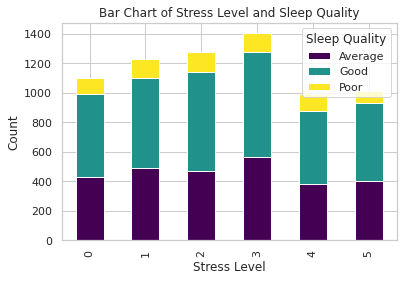

Sleep_Quality


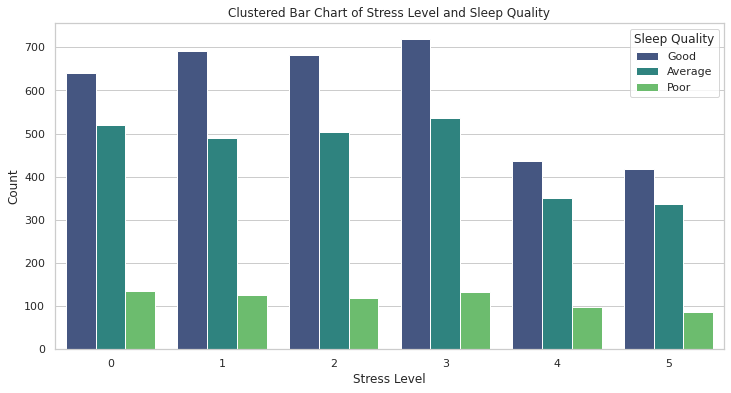

Relationship


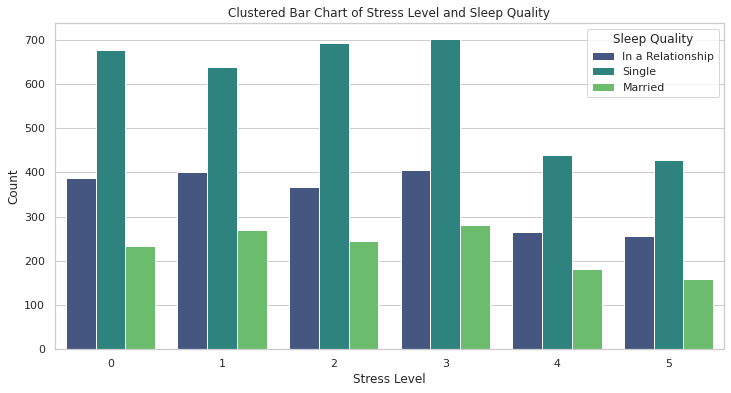

Substance


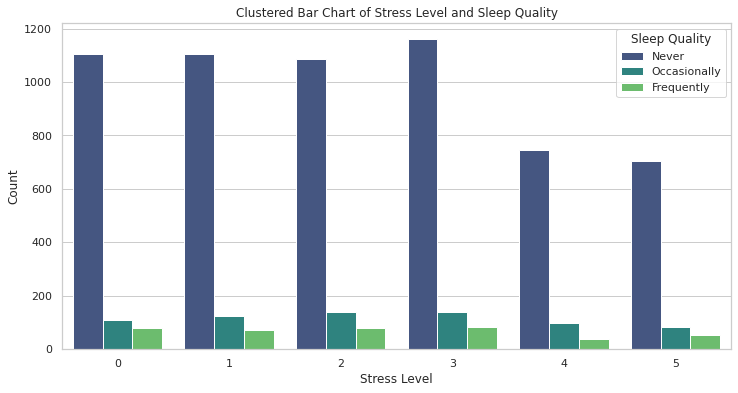

Social Support


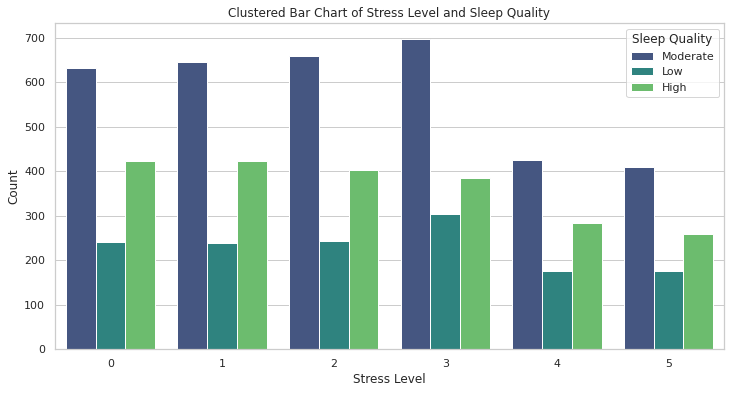

Diet


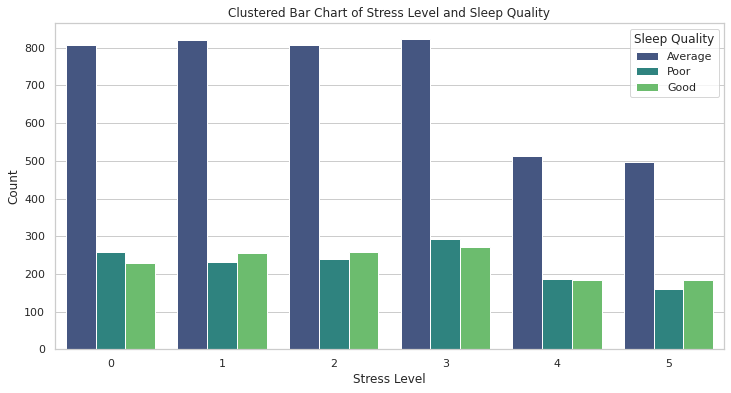

Physical Activity


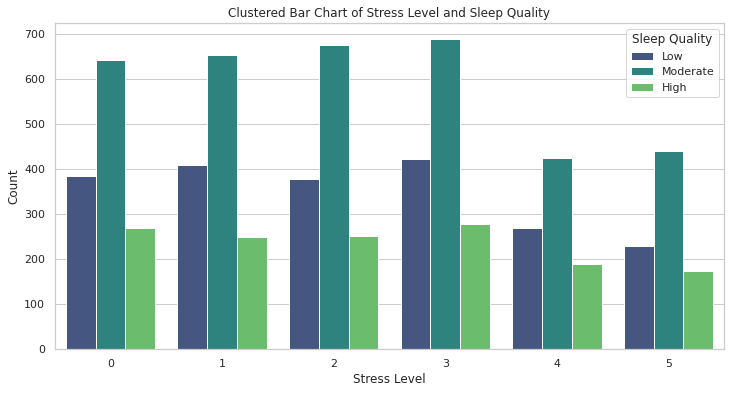

Course


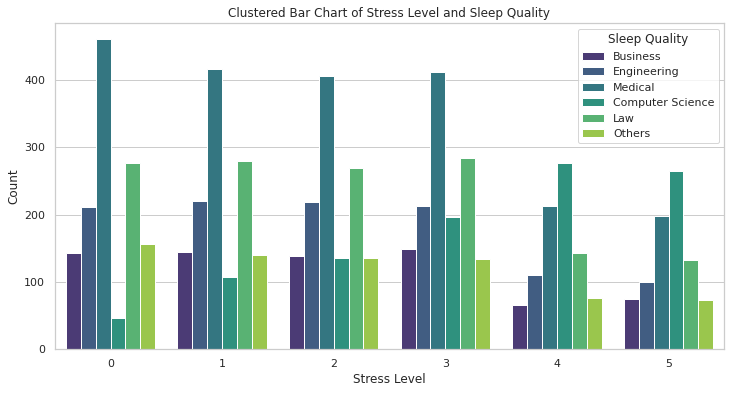

Gender


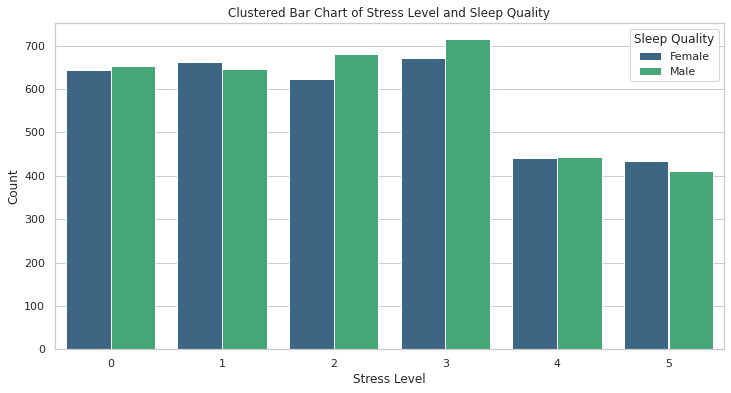

In [11]:
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming the columns you want to plot are 'Stress_Level' and 'Sleep_Quality'

# Create a contingency table
contingency_table = pd.crosstab(df['Stress_Level'], df['Sleep_Quality'])

# Plot a bar chart
plt.figure(figsize=(12, 6))
contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming the columns you want to plot are 'Stress_Level' and 'Sleep_Quality'

# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Sleep_Quality')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Sleep_Quality', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Relationship')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Relationship_Status', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()



# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Substance')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Substance_Use', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()



# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Social Support')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Social_Support', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()

print('Diet')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Diet_Quality', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Physical Activity')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Physical_Activity', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Course')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Course', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Gender')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Gender', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()



<Figure size 864x432 with 0 Axes>

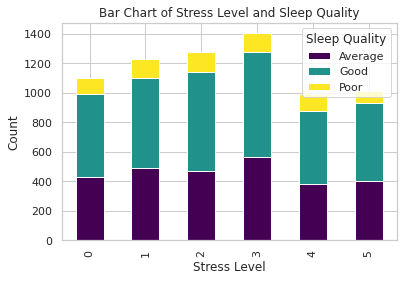

Sleep_Quality


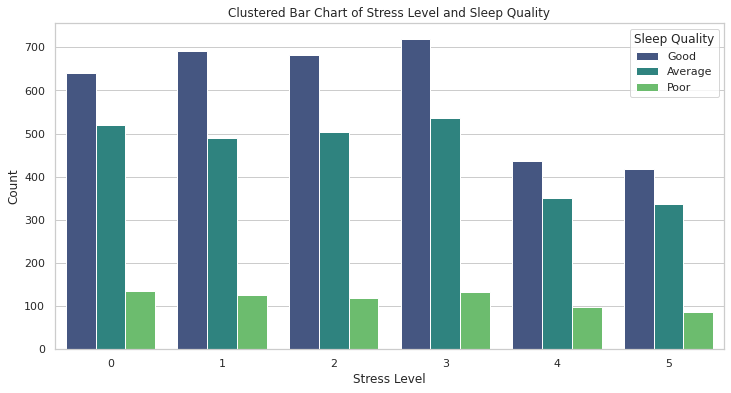

Relationship


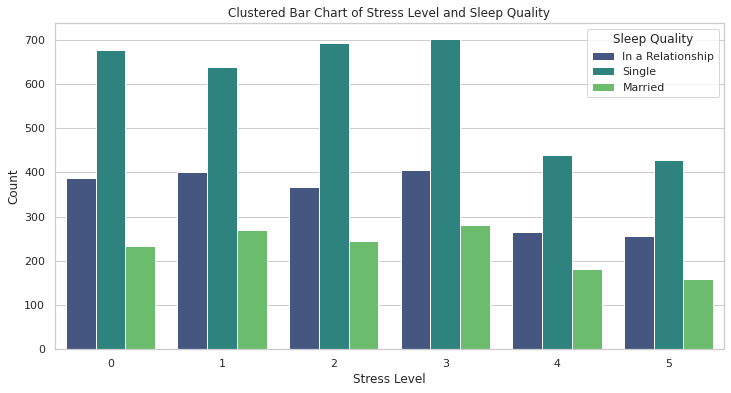

Substance


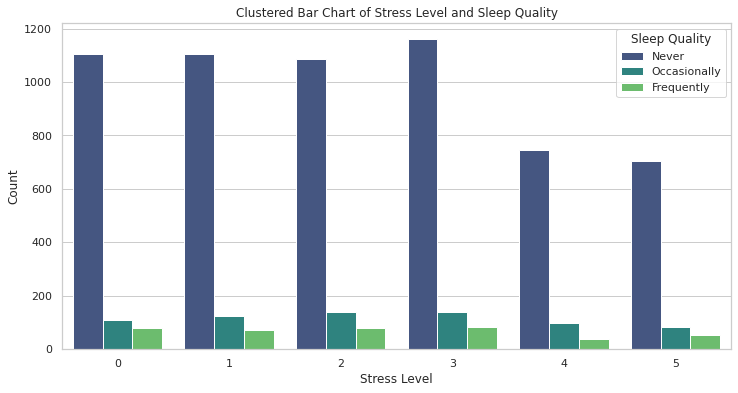

Social Support


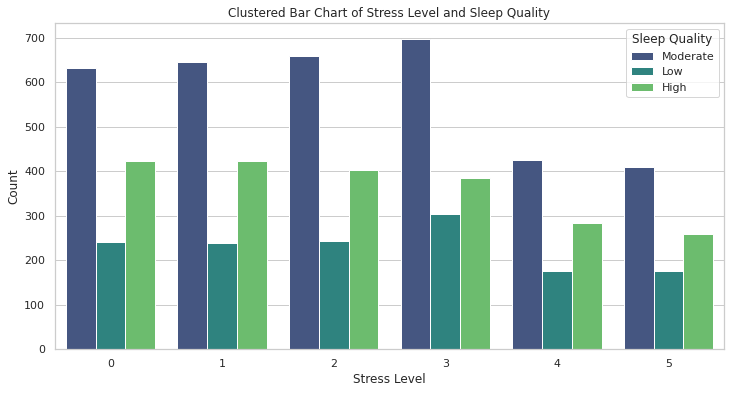

Diet


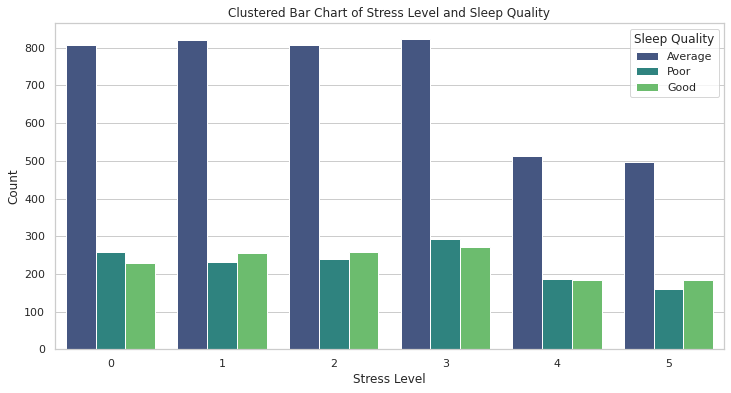

Physical Activity


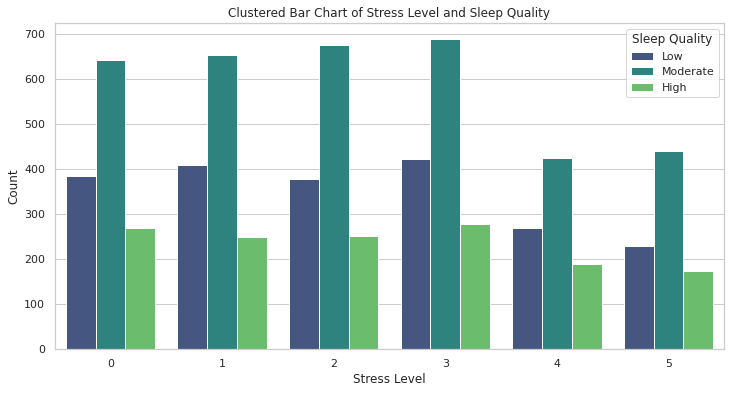

Course


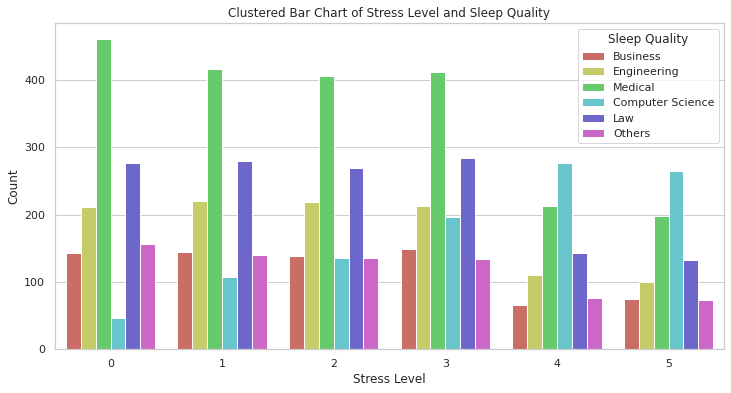

Course


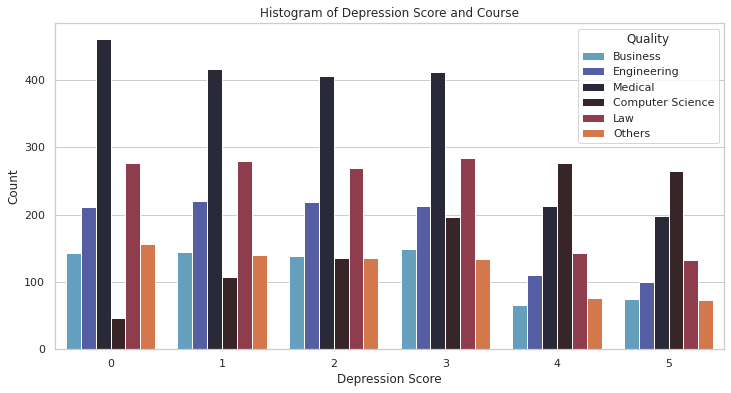

Course


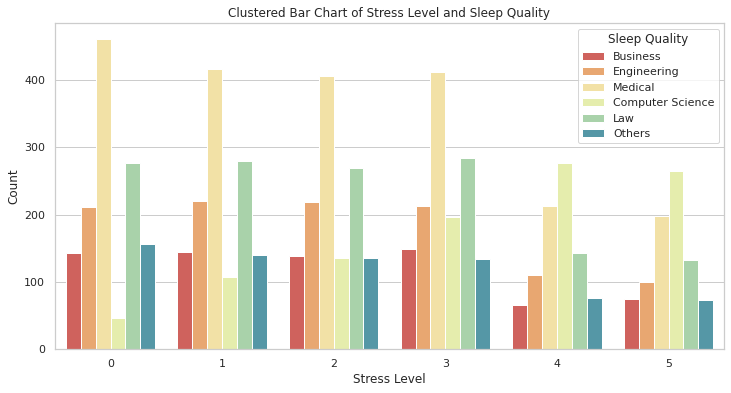

Gender


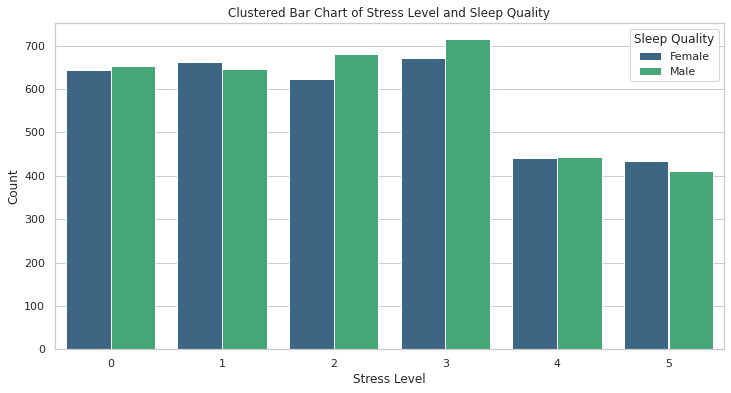

In [12]:
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming the columns you want to plot are 'Stress_Level' and 'Sleep_Quality'

# Create a contingency table
contingency_table = pd.crosstab(df['Stress_Level'], df['Sleep_Quality'])

# Plot a bar chart
plt.figure(figsize=(12, 6))
contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming the columns you want to plot are 'Stress_Level' and 'Sleep_Quality'

# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Sleep_Quality')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Sleep_Quality', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Relationship')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Relationship_Status', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()



# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Substance')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Substance_Use', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()



# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Social Support')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Social_Support', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()

print('Diet')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Diet_Quality', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Physical Activity')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Physical_Activity', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Course')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Course', data=df, palette='hls')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Course')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Course', data=df, palette='icefire')
plt.title('Histogram of Depression Score and Course')
plt.xlabel('Depression Score')
plt.ylabel('Count')
plt.legend(title='Quality')
plt.show()

print('Course')
palette = sns.color_palette("Spectral", as_cmap=True)

# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Course', data=df, palette='Spectral')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Gender')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Gender', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()



<Figure size 864x432 with 0 Axes>

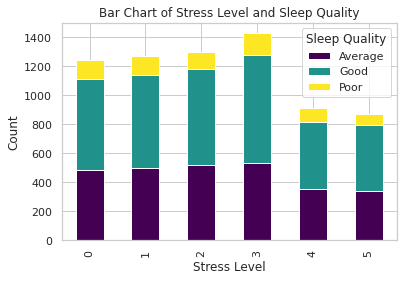

Sleep_Quality


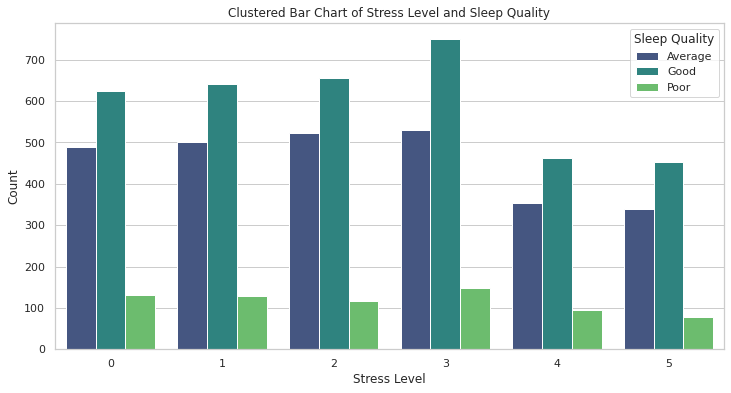

Relationship


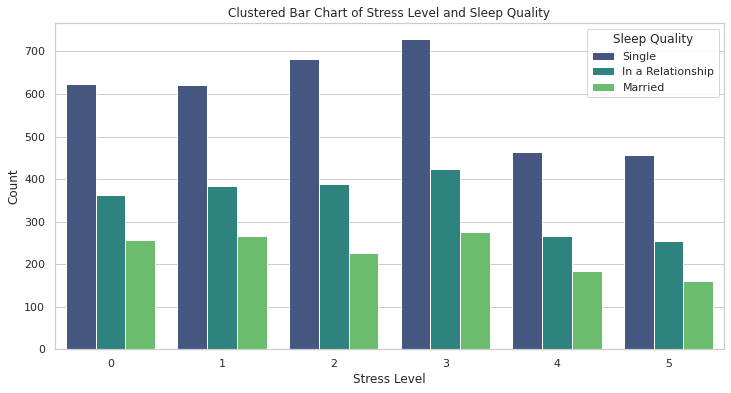

Substance


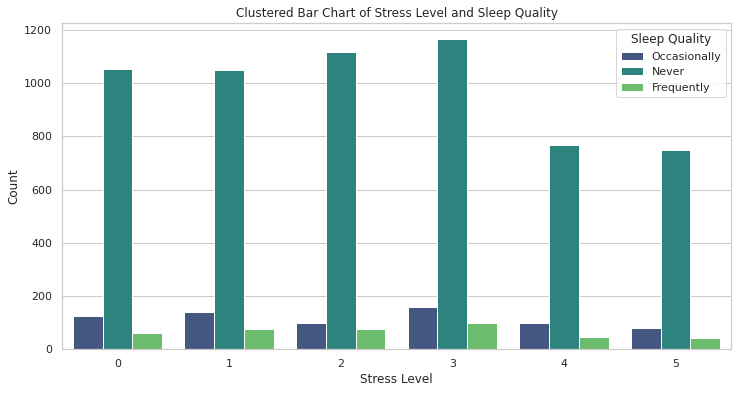

Social Support


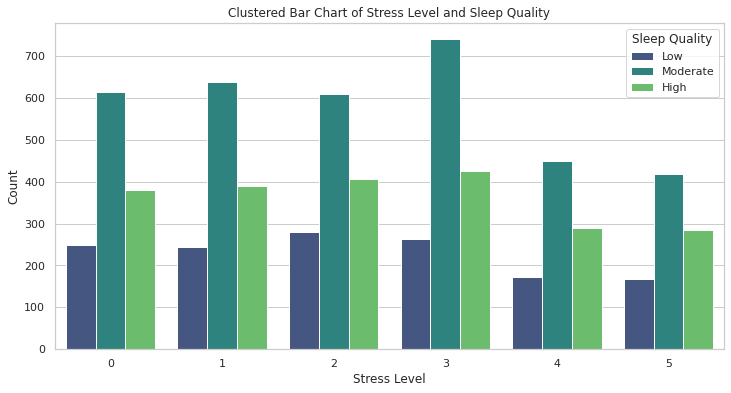

Diet


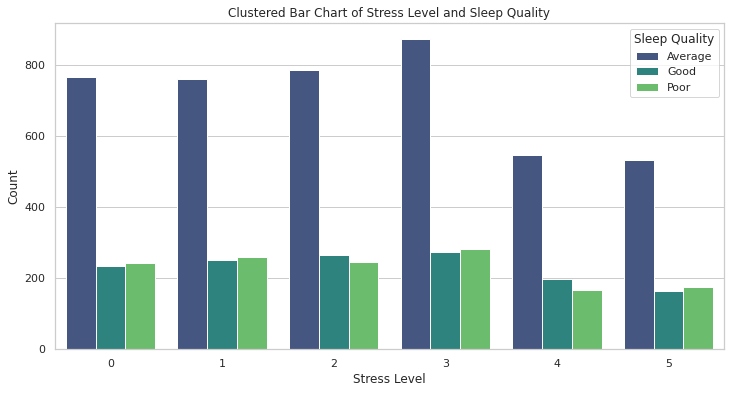

Physical Activity


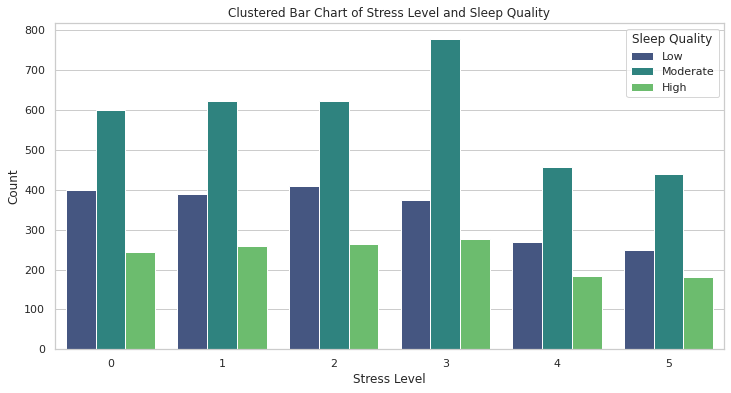

Course


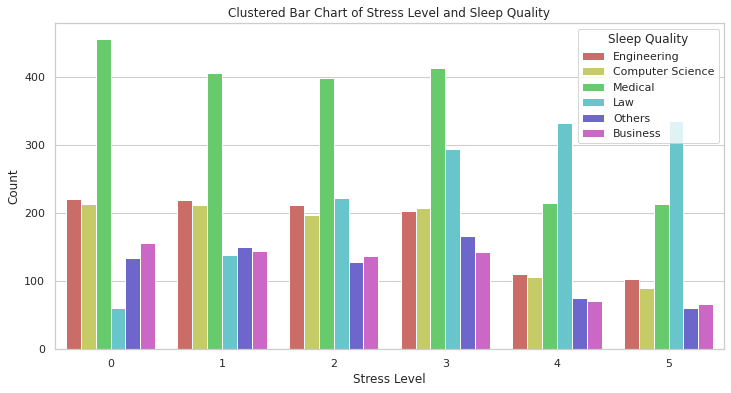

Course


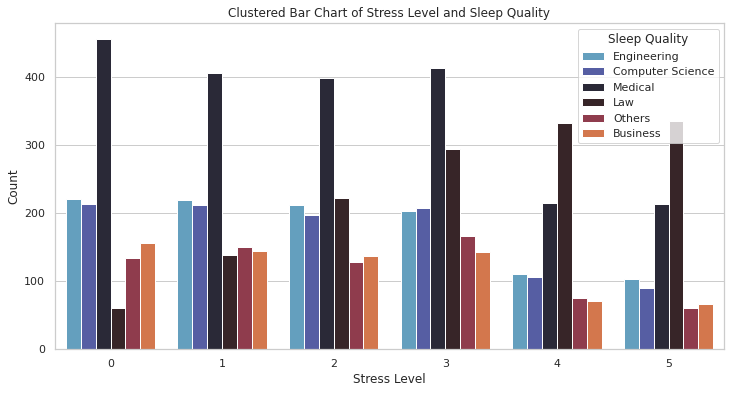

Course


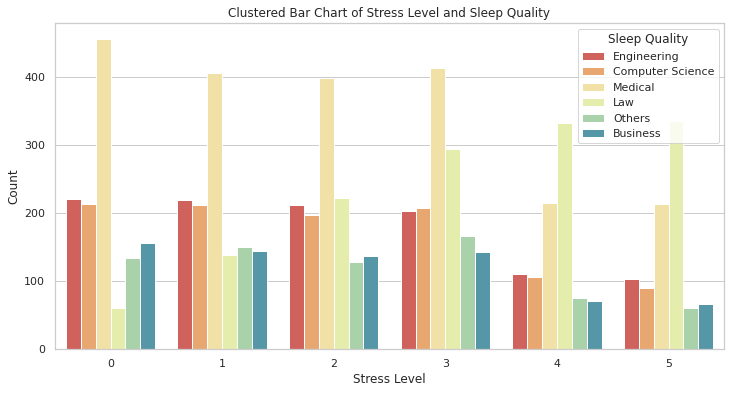

Gender


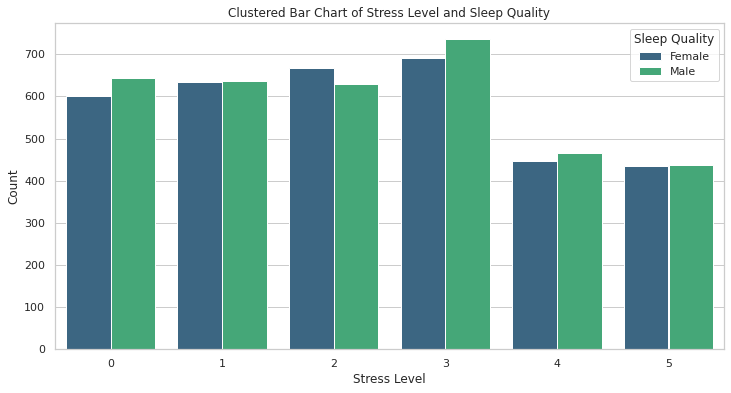

In [13]:
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming the columns you want to plot are 'Stress_Level' and 'Sleep_Quality'

# Create a contingency table
contingency_table = pd.crosstab(df['Anxiety_Score'], df['Sleep_Quality'])

# Plot a bar chart
plt.figure(figsize=(12, 6))
contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming the columns you want to plot are 'Anxiety_Score' and 'Sleep_Quality'

# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Sleep_Quality')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Anxiety_Score', hue='Sleep_Quality', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Relationship')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Anxiety_Score', hue='Relationship_Status', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()



# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Substance')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Anxiety_Score', hue='Substance_Use', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()



# Set the style for the plot (optional)
sns.set(style="whitegrid")

print('Social Support')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Anxiety_Score', hue='Social_Support', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()

print('Diet')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Anxiety_Score', hue='Diet_Quality', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Physical Activity')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Anxiety_Score', hue='Physical_Activity', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Course')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Anxiety_Score', hue='Course', data=df, palette='hls')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Course')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Anxiety_Score', hue='Course', data=df, palette='icefire')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()

print('Course')
palette = sns.color_palette("Spectral", as_cmap=True)

# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Anxiety_Score', hue='Course', data=df, palette='Spectral')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


print('Gender')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Anxiety_Score', hue='Gender', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()



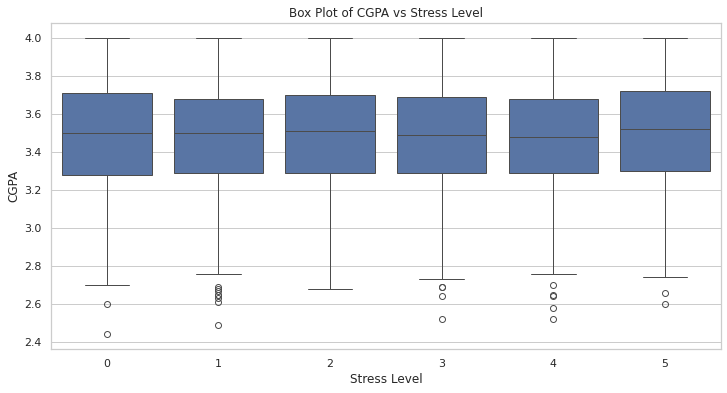

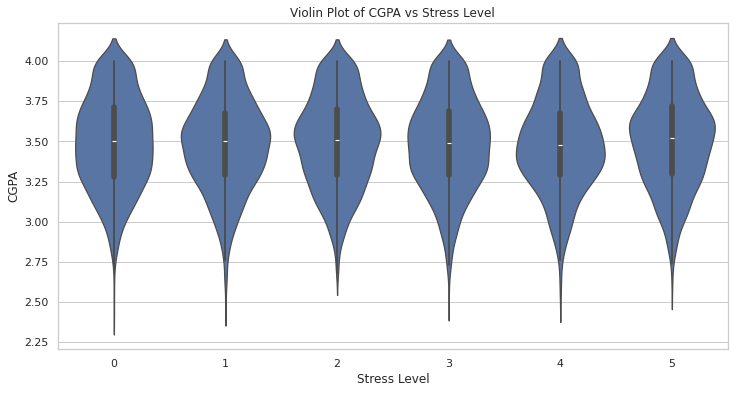

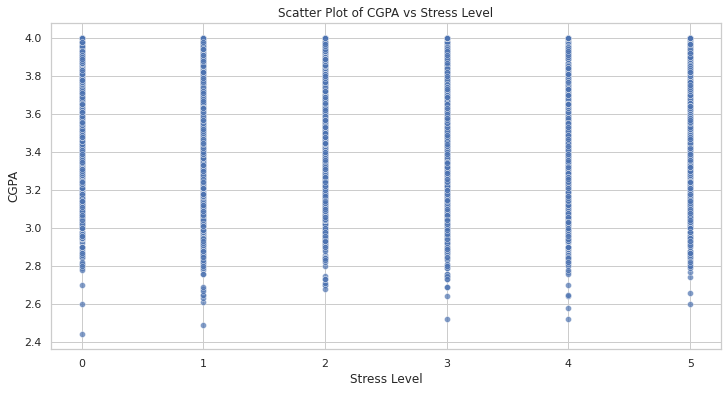

In [14]:
# print(df.describe())
# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stress_Level', y='CGPA', data=df)
plt.title('Box Plot of CGPA vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Stress_Level', y='CGPA', data=df)
plt.title('Violin Plot of CGPA vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()

# Scatter plot (optional)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Stress_Level', y='CGPA', data=df, alpha=0.7)
plt.title('Scatter Plot of CGPA vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('CGPA')
plt.show()


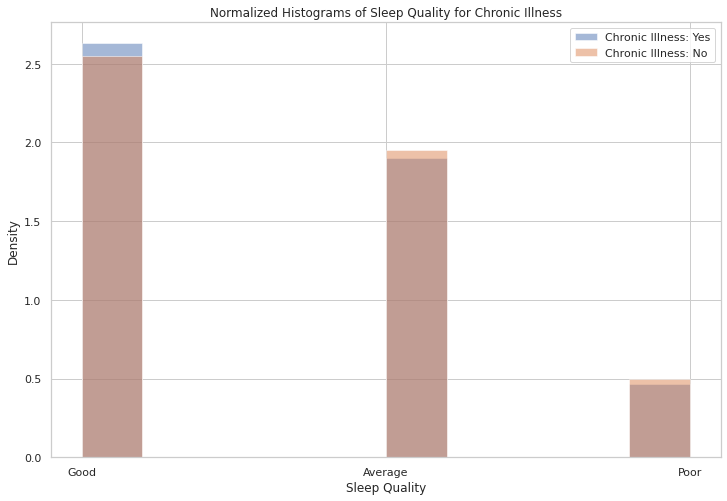

<Figure size 864x576 with 0 Axes>

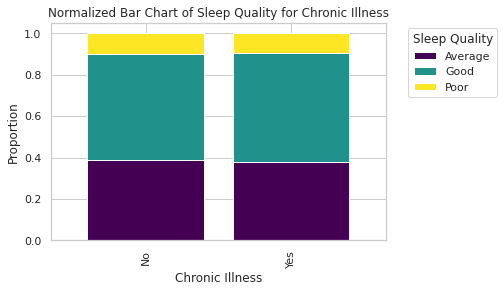

In [15]:
plt.figure(figsize=(12, 8))

# Histogram for Chronic_Illness
plt.hist(df[df['Chronic_Illness'] == 'Yes']['Sleep_Quality'], alpha=0.5, label='Chronic Illness: Yes', density=True)

# Histogram for Chronic_Illness 'No'
plt.hist(df[df['Chronic_Illness'] == 'No']['Sleep_Quality'], alpha=0.5, label='Chronic Illness: No', density=True)

plt.title('Normalized Histograms of Sleep Quality for Chronic Illness')
plt.xlabel('Sleep Quality')
plt.ylabel('Density')
plt.legend()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming 'Chronic_Illness' and 'Sleep_Quality' are categorical variables

# Create a DataFrame with normalized counts
normalized_counts = df.groupby(['Chronic_Illness', 'Sleep_Quality']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting side-by-side (grouped) bar chart
plt.figure(figsize=(12, 8))
normalized_counts.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)

plt.title('Normalized Bar Chart of Sleep Quality for Chronic Illness')
plt.xlabel('Chronic Illness')
plt.ylabel('Proportion')
plt.legend(title='Sleep Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


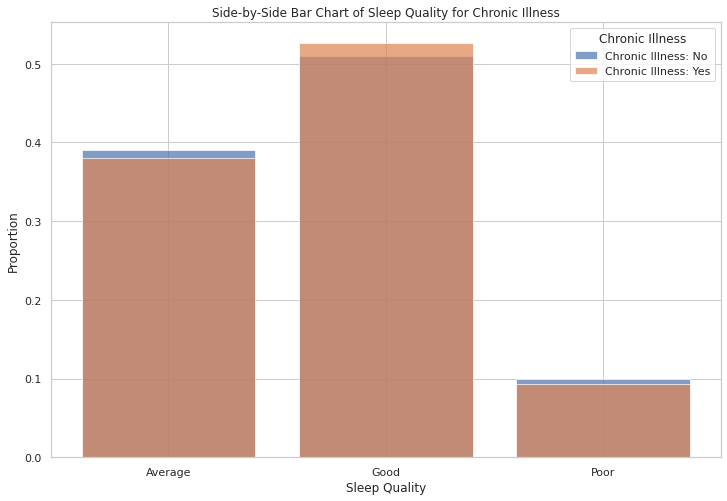

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming 'Chronic_Illness' and 'Sleep_Quality' are categorical variables

# Create a DataFrame with normalized counts
normalized_counts = df.groupby(['Chronic_Illness', 'Sleep_Quality']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting side-by-side (grouped) bar chart
plt.figure(figsize=(12, 8))

# Iterate over 'Chronic_Illness' values
for status in normalized_counts.index:
    plt.bar(normalized_counts.columns, normalized_counts.loc[status], label=f'Chronic Illness: {status}', alpha=0.7)

plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness')
plt.xlabel('Sleep Quality')
plt.ylabel('Proportion')
plt.legend(title='Chronic Illness')
plt.show()


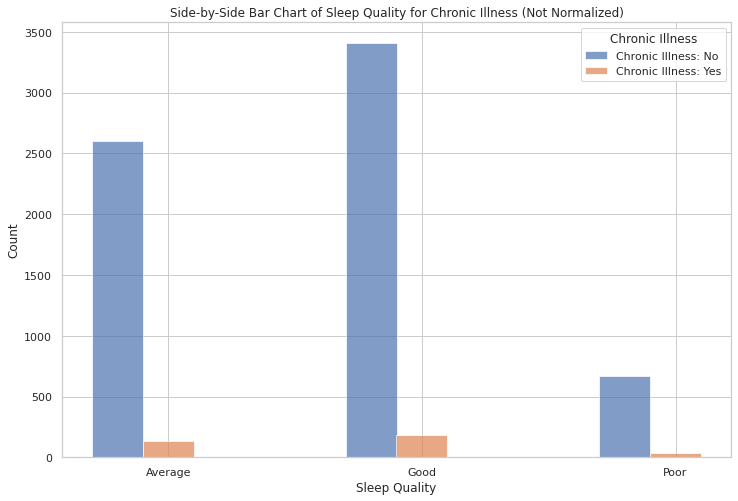

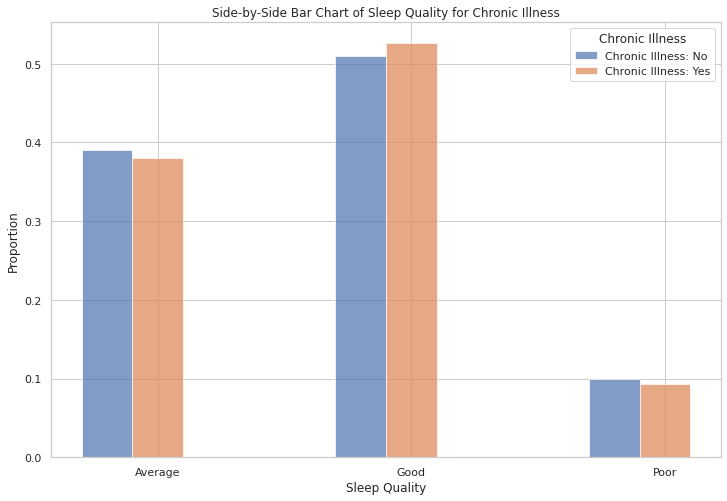

In [17]:
# not normalised
# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming 'Chronic_Illness' and 'Sleep_Quality' are categorical variables

# Create a DataFrame with counts
counts = df.groupby(['Chronic_Illness', 'Sleep_Quality']).size().unstack(fill_value=0)

# Plotting side-by-side (grouped) bar chart
plt.figure(figsize=(12, 8))

# Define the x-axis positions for each category
x_positions = np.arange(len(counts.columns))

# Iterate over 'Chronic_Illness' values
for i, status in enumerate(counts.index):
    plt.bar(x_positions + i * 0.2, counts.loc[status], width=0.2, label=f'Chronic Illness: {status}', alpha=0.7)

plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness (Not Normalized)')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.xticks(x_positions + 0.2, counts.columns)  # Set x-axis ticks
plt.legend(title='Chronic Illness')
plt.show()




# normalised
# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming 'Chronic_Illness' and 'Sleep_Quality' are categorical variables

# Create a DataFrame with normalized counts
normalized_counts = df.groupby(['Chronic_Illness', 'Sleep_Quality']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting side-by-side (grouped) bar chart
plt.figure(figsize=(12, 8))

# Define the x-axis positions for each category
x_positions = np.arange(len(normalized_counts.columns))

# Iterate over 'Chronic_Illness' values
for i, status in enumerate(normalized_counts.index):
    plt.bar(x_positions + i * 0.2, normalized_counts.loc[status], width=0.2, label=f'Chronic Illness: {status}', alpha=0.7)

plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness')
plt.xlabel('Sleep Quality')
plt.ylabel('Proportion')
plt.xticks(x_positions + 0.2, normalized_counts.columns)  # Set x-axis ticks
plt.legend(title='Chronic Illness')
plt.show()


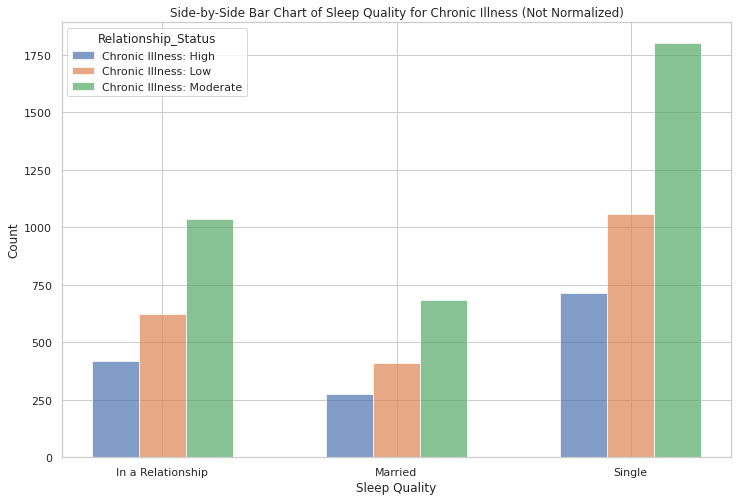

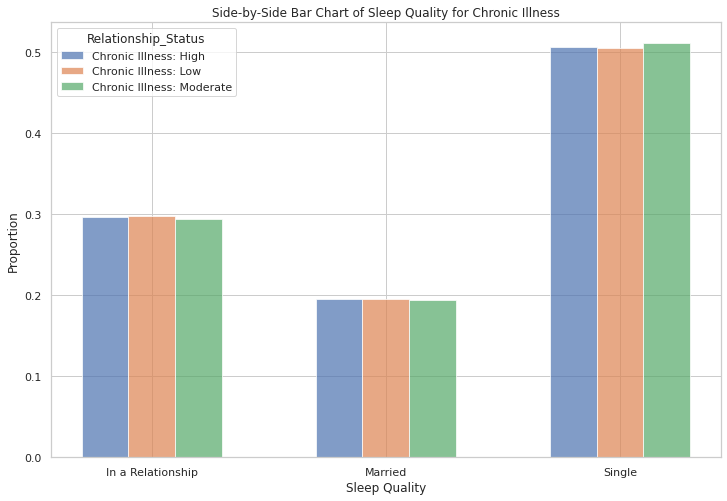

In [18]:
# physical_activty and relationship_status

# not normalised
# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming 'Chronic_Illness' and 'Sleep_Quality' are categorical variables

# Create a DataFrame with counts
counts = df.groupby(['Physical_Activity', 'Relationship_Status']).size().unstack(fill_value=0)

# Plotting side-by-side (grouped) bar chart
plt.figure(figsize=(12, 8))

# Define the x-axis positions for each category
x_positions = np.arange(len(counts.columns))

# Iterate over 'Chronic_Illness' values
for i, status in enumerate(counts.index):
    plt.bar(x_positions + i * 0.2, counts.loc[status], width=0.2, label=f'Chronic Illness: {status}', alpha=0.7)

plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness (Not Normalized)')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.xticks(x_positions + 0.2, counts.columns)  # Set x-axis ticks
plt.legend(title='Relationship_Status')
plt.show()




# normalised
# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming 'Chronic_Illness' and 'Sleep_Quality' are categorical variables

# Create a DataFrame with normalized counts
normalized_counts = df.groupby(['Physical_Activity', 'Relationship_Status']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting side-by-side (grouped) bar chart
plt.figure(figsize=(12, 8))

# Define the x-axis positions for each category
x_positions = np.arange(len(normalized_counts.columns))

# Iterate over 'Chronic_Illness' values
for i, status in enumerate(normalized_counts.index):
    plt.bar(x_positions + i * 0.2, normalized_counts.loc[status], width=0.2, label=f'Chronic Illness: {status}', alpha=0.7)

plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness')
plt.xlabel('Sleep Quality')
plt.ylabel('Proportion')
plt.xticks(x_positions + 0.2, normalized_counts.columns)  # Set x-axis ticks
plt.legend(title='Relationship_Status')
plt.show()


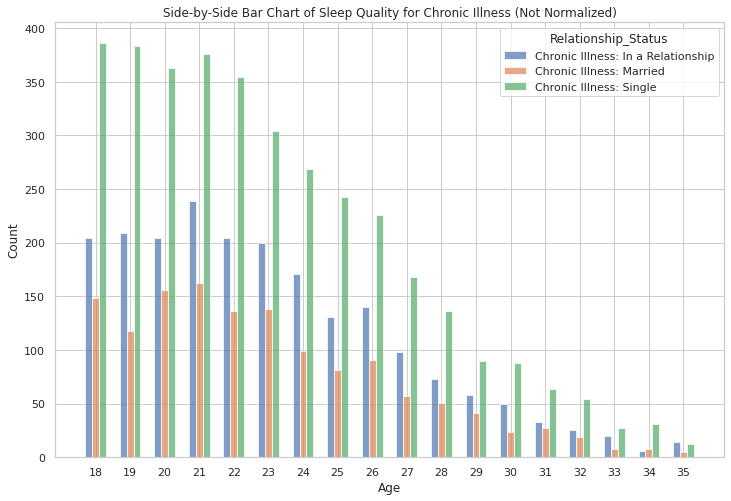

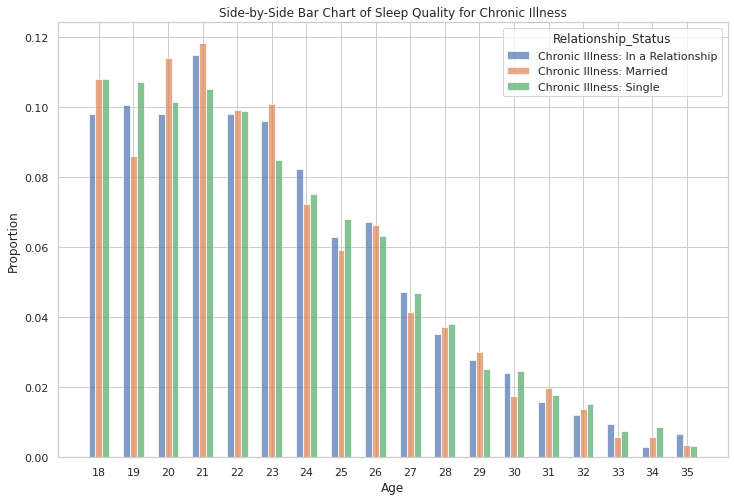

In [19]:
# physical_activty and relationship_status

# not normalised
# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming 'Chronic_Illness' and 'Sleep_Quality' are categorical variables

# Create a DataFrame with counts
counts = df.groupby(['Relationship_Status', 'Age']).size().unstack(fill_value=0)

# Plotting side-by-side (grouped) bar chart
plt.figure(figsize=(12, 8))

# Define the x-axis positions for each category
x_positions = np.arange(len(counts.columns))

# Iterate over 'Chronic_Illness' values
for i, status in enumerate(counts.index):
    plt.bar(x_positions + i * 0.2, counts.loc[status], width=0.2, label=f'Chronic Illness: {status}', alpha=0.7)

plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness (Not Normalized)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(x_positions + 0.2, counts.columns)  # Set x-axis ticks
plt.legend(title='Relationship_Status')
plt.show()




# normalised
# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame
# Assuming 'Chronic_Illness' and 'Sleep_Quality' are categorical variables

# Create a DataFrame with normalized counts
normalized_counts = df.groupby(['Relationship_Status', 'Age']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting side-by-side (grouped) bar chart
plt.figure(figsize=(12, 8))

# Define the x-axis positions for each category
x_positions = np.arange(len(normalized_counts.columns))

# Iterate over 'Chronic_Illness' values
for i, status in enumerate(normalized_counts.index):
    plt.bar(x_positions + i * 0.2, normalized_counts.loc[status], width=0.2, label=f'Chronic Illness: {status}', alpha=0.7)

plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.xticks(x_positions + 0.2, normalized_counts.columns)  # Set x-axis ticks
plt.legend(title='Relationship_Status')
plt.show()


Gender


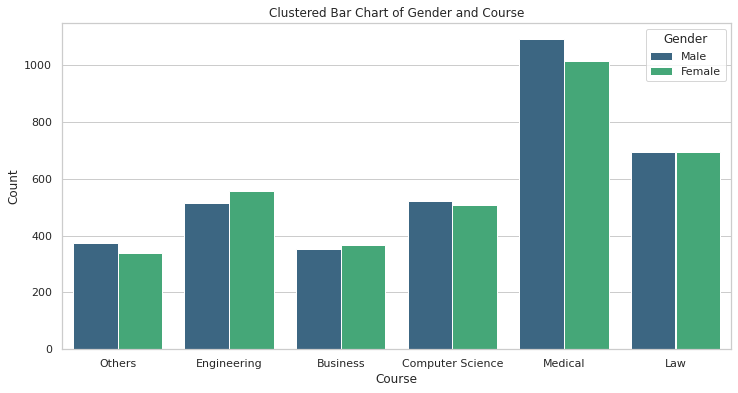

In [20]:
# Gender a Course
print('Gender')
# Create a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Course', hue='Gender', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Gender and Course')
plt.xlabel('Course')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

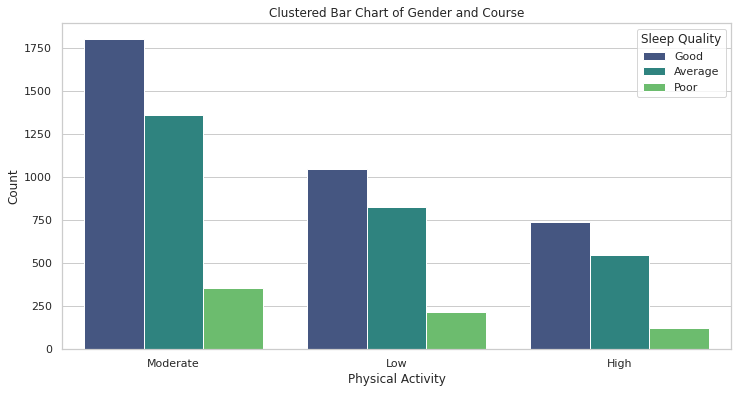

In [21]:
# Sleep Quality and Physical Activity

plt.figure(figsize=(12, 6))
sns.countplot(x='Physical_Activity', hue='Sleep_Quality', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Gender and Course')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()

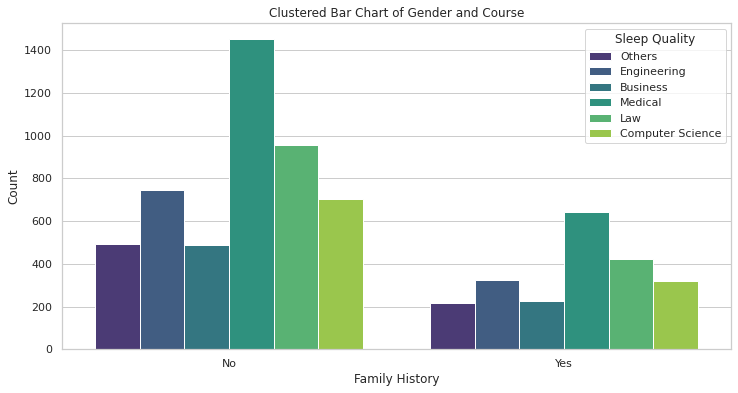

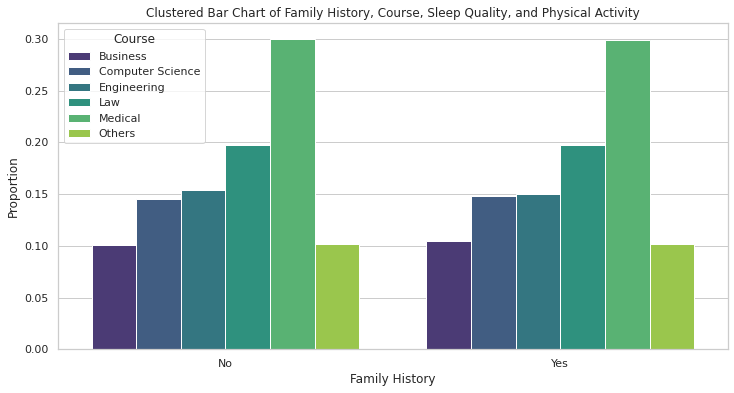

In [46]:
# Sleep Quality and Physical Activity

plt.figure(figsize=(12, 6))
sns.countplot(x='Family_History', hue='Course', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Gender and Course')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()


# Calculate proportions for each combination of 'Family_History' and 'Course'
normalized_data = df.groupby(['Family_History', 'Course']).size() / df.groupby(['Family_History']).size()

# Reshape the data to create a DataFrame suitable for Seaborn
normalized_data = normalized_data.reset_index(name='Proportion')

# Sleep Quality and Physical Activity
plt.figure(figsize=(12, 6))
sns.barplot(x='Family_History', y='Proportion', hue='Course', data=normalized_data, palette='viridis')
plt.title('Clustered Bar Chart of Family History, Course, Sleep Quality, and Physical Activity')
plt.xlabel('Family History')
plt.ylabel('Proportion')
plt.legend(title='Course')
plt.show()

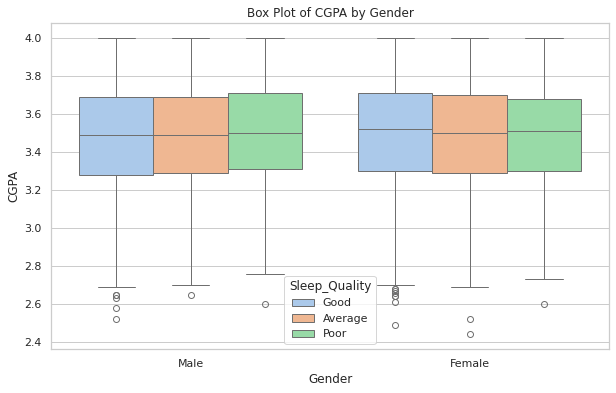

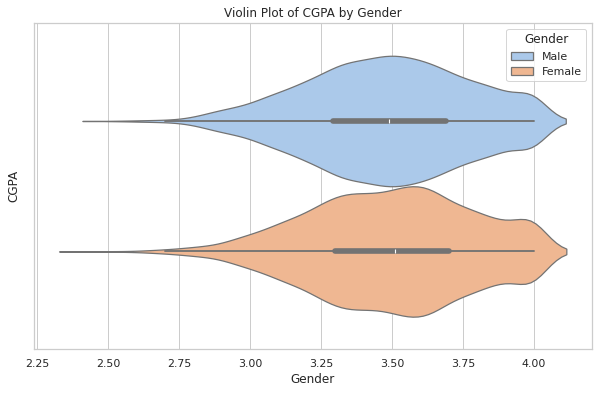

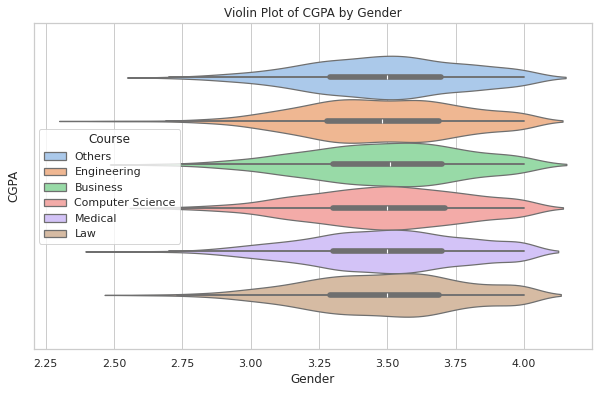

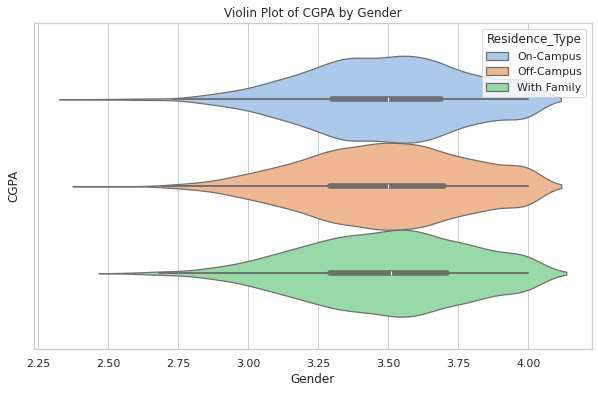

In [22]:
# CGPA and Gender
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='CGPA', hue='Sleep_Quality', data=df, palette='pastel')
plt.title('Box Plot of CGPA by Gender')
plt.xlabel('Gender')
plt.ylabel('CGPA')
plt.show()

# Violin plot (optional)
plt.figure(figsize=(10, 6))
sns.violinplot(x='CGPA', hue='Gender', data=df, palette='pastel')
plt.title('Violin Plot of CGPA by Gender')
plt.xlabel('Gender')
plt.ylabel('CGPA')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='CGPA', hue='Course', data=df, palette='pastel')
plt.title('Violin Plot of CGPA by Gender')
plt.xlabel('Gender')
plt.ylabel('CGPA')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='CGPA', hue='Residence_Type', data=df, palette='pastel')
plt.title('Violin Plot of CGPA by Gender')
plt.xlabel('Gender')
plt.ylabel('CGPA')
plt.show()

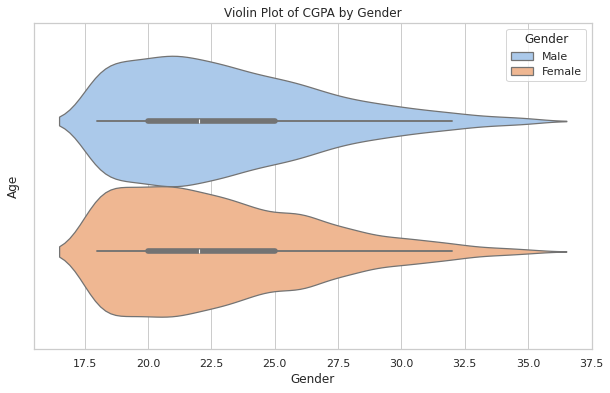

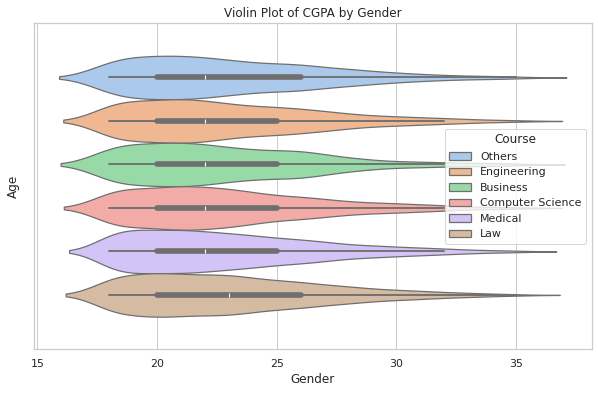

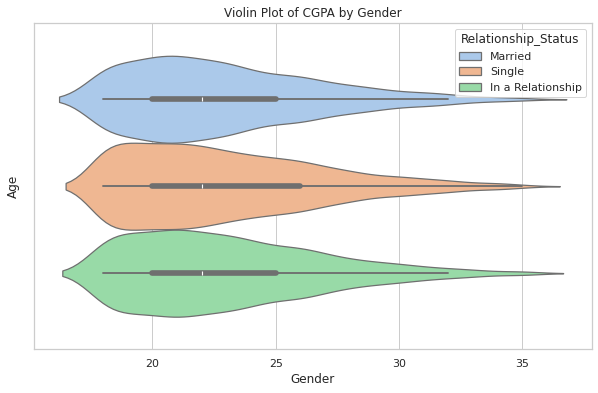

In [23]:
# CGPA and Gender
# Box plot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Relationship_Status', y='Age', data=df, palette='pastel')
# plt.title('Box Plot of CGPA by Gender')
# plt.xlabel('Gender')
# plt.ylabel('CGPA')
# plt.show()

# Violin plot (optional)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', hue='Gender', data=df, palette='pastel')
plt.title('Violin Plot of CGPA by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', hue='Course', data=df, palette='pastel')
plt.title('Violin Plot of CGPA by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', hue='Relationship_Status', data=df, palette='pastel')
plt.title('Violin Plot of CGPA by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

Nejčatější hodnoty a jejich frekvence pro jednotlivé kategorie.

In [24]:
# for column in df.select_dtypes(include=['object', 'category']).columns:
#     print(df[column].value_counts())
#     print("\n")

In [25]:
# Nastavení stylu grafů
# sns.set(style="whitegrid")

# # Univariátní analýza: Numerické proměnné
# numerical_columns = ['Age', 'CGPA', 'Stress_Level', 'Depression_Score']

# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numerical_columns):
#     plt.subplot(2, 2, i + 1)
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Histogram of {col}')
# plt.tight_layout()
# plt.show()

# # Univariátní analýza: Kategorické proměnné
# categorical_columns = ['Gender', 'Sleep_Quality', 'Physical_Activity']

# plt.figure(figsize=(15, 10))
# for i, col in enumerate(categorical_columns):
#     plt.subplot(2, 2, i + 1)
#     sns.countplot(x=col, data=df)
#     plt.title(f'Countplot of {col}')
# plt.tight_layout()
# plt.show()

### Detekce odlehlých hodnot

Pro identifikazi odlehlých hodnot v datové sadě byla provedena analýza popiských statistik a histogramů jednotlivých atributů. Průměrné hodnoty, mediány a ostatní popisné statistiky (viz podkapitola ...) odpovídají očekávání a neposkytují tedy důvody ke zvážení odstranění nebo transformace některých těchto hodnot jakožto odlehlých. V histogramech by se pak dále odlehlé hodnoty projevily jako extrémní hodnoty, které se výrazně liší od většiny ostatních hodnot a nabývají neočekávaných hodnot. Opět, po důkladném prozkoumání histogramů jednotlivých atributů z podkapitoly ... nebyly žádné takové hodnoty detekovány.

### Analýza chybějících hodnot

Datová sada obsahuje chybějící hodnoty - CGPA a Sneco

Vypsat atributy, které mají nan hodnoty a kolik jich je

vypsat záznamy, které mají oba atributy najednou jako nan - ty možná vymazat úplně?



In [27]:
# Print the number of missing values in each column
missing_values_per_column = df.isnull().sum()
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]
print("Number of missing values in each column:")
print(columns_with_missing_values)

# Identify rows with missing values in all of the columns with at least one missing value
# rows_with_missing_values = df[df[columns_with_missing_values.index].isnull().all(axis=1)]
rows_with_missing_values = df[df['CGPA'].isnull() & df['Substance_Use'].isnull()]

# Print the number of rows with missing values in all of the specified columns
num_rows_with_missing_values = len(rows_with_missing_values)
print(f"\nNumber of rows with missing values in all of the specified columns: {num_rows_with_missing_values}")

Number of missing values in each column:
CGPA             12
Substance_Use    15
dtype: int64

Number of rows with missing values in all of the specified columns: 0


Během analýzy dat jsme identifikovali dva atributy obsahující chybějící hodnoty: CGPA a Substance_Use. Atribut CGPA je typu float a obsahuje 19 chybějících hodnot, zatímco atribut Substance_Use, který je kategorický, obsahuje 15 chybějících hodnot.



Jak je vidět, v datové sadě není ani jeden záznam, u kterého by chyběla hodnota více atributů než jednoho. 

Popsatmetody odstranění chybějících atributů až ve druhé části

Strategie pro Chybějící Hodnoty
1. Atribut CGPA
Vzhledem k nízkému počtu chybějících hodnot v atributu CGPA (19 záznamů ze 7000+) a faktu, že tento atribut obsahuje hodnoty typu float, máme několik možností:

Doplnění Průměrnou Hodnotou: Chybějící hodnoty lze doplnit průměrnou hodnotou atributu CGPA.
Doplnění Mediánem: Další možností je doplnit chybějící hodnoty mediánem tohoto atributu.
2. Atribut Substance_Use
Pro atribut Substance_Use, který je kategorický, lze chybějící hodnoty doplnit nejčastěji se vyskytující kategorií, tj. modou. Další možností může být vytvoření nové kategorie pro chybějící hodnoty.



### Korelační analýza

['Course', 'Gender', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Financial_Stress', 'Extracurricular_Involvement', 'Residence_Type']
['Age', 'CGPA', 'Semester_Credit_Load']


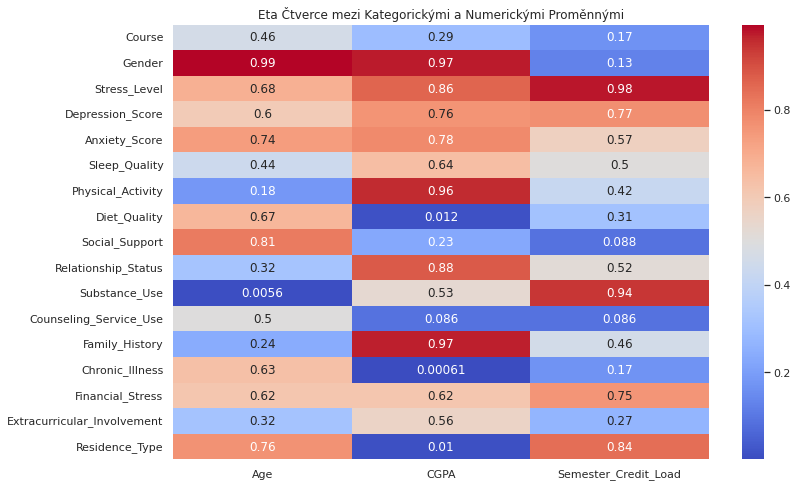

In [28]:
from sklearn.feature_selection import f_classif
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df.dropna()

def eta_squared(X, y):
    """ Výpočet Eta čtverce pro vztah mezi kategorickou a numerickou proměnnou. """
    anova = f_classif(X, y)
    eta_sq = anova[0] / (anova[0] + anova[1])
    return eta_sq

  # Replace [...] with your categorical attributes
numerical_attributes = kvantitative_attributes    # Replace [...] with your numerical attributes

print(categorical_attributes)
print(numerical_attributes)
# Vytvoření DataFrame pro výsledky Eta čtverce
eta_squared_results = pd.DataFrame(index=categorical_attributes, columns=numerical_attributes)

# Výpočet Eta čtverce pro každou kombinaci kategorických a numerických sloupců
for cat_col in categorical_attributes:
    for num_col in numerical_attributes:
        eta_sq = eta_squared(df[[num_col]], df[cat_col])
        eta_squared_results.loc[cat_col, num_col] = eta_sq[0]

# Vizualizace výsledků
plt.figure(figsize=(12, 8))
sns.heatmap(eta_squared_results.astype(float), annot=True, cmap='coolwarm')
plt.title('Eta Čtverce mezi Kategorickými a Numerickými Proměnnými')
plt.show()


<Figure size 720x432 with 0 Axes>

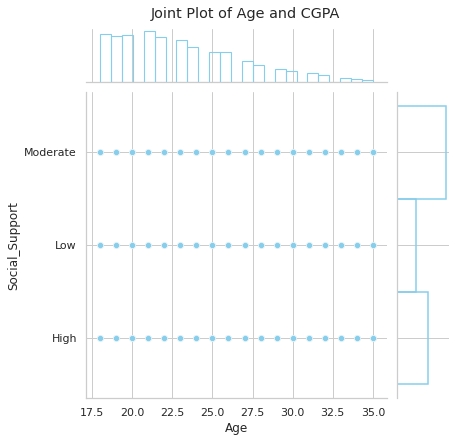

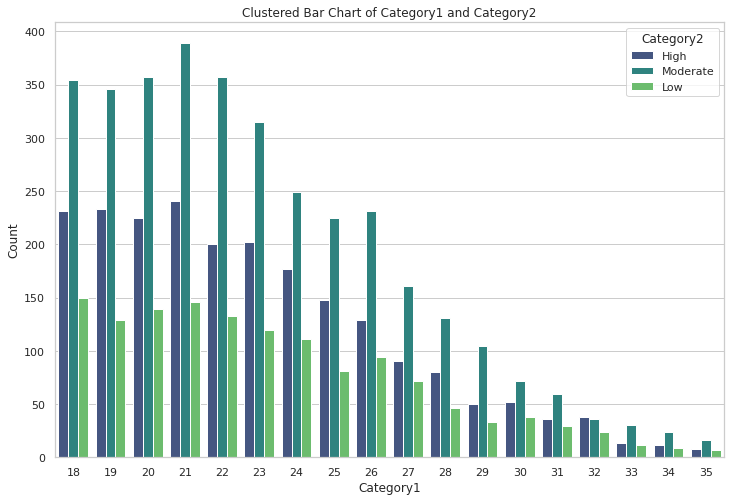

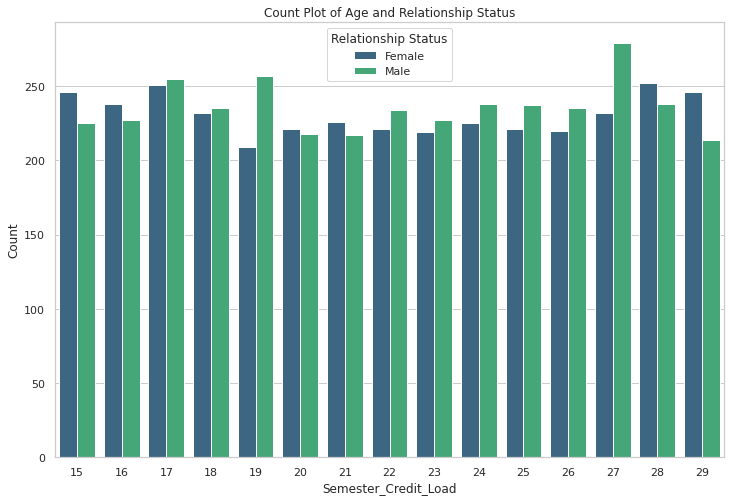

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame

# Create a joint plot
plt.figure(figsize=(10, 6))
sns.jointplot(x='Age', y='Social_Support', data=df, kind='scatter', marginal_kws=dict(bins=25, fill=False), color='skyblue')
plt.suptitle('Joint Plot of Age and CGPA', y=1.02)
plt.show()

# Create a clustered bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='Age', hue='Social_Support', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Category1 and Category2')
plt.xlabel('Category1')
plt.ylabel('Count')
plt.legend(title='Category2')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='Semester_Credit_Load', hue='Gender', data=df, palette='viridis')
plt.title('Count Plot of Age and Relationship Status')
plt.xlabel('Semester_Credit_Load')
plt.ylabel('Count')
plt.legend(title='Relationship Status')
plt.show()

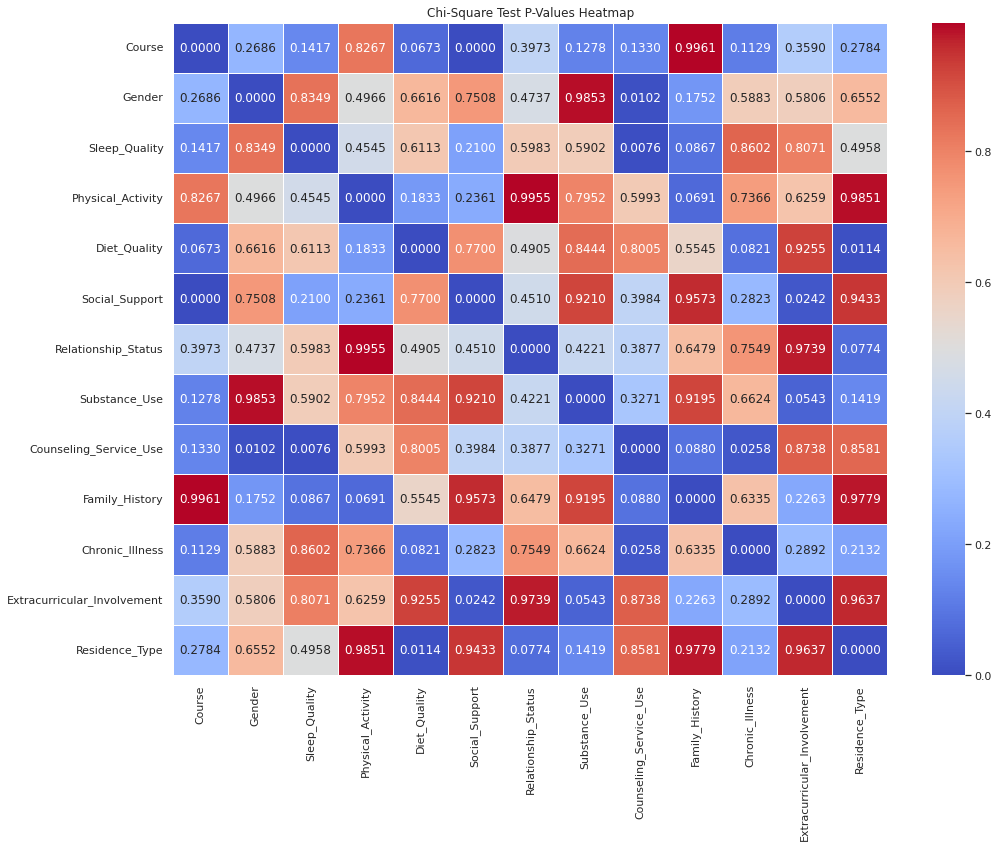

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame

# Extract categorical attributes
categorical_attributes = df.select_dtypes(include=['object']).columns

# Create an empty DataFrame for p-values
p_values_df = pd.DataFrame(index=categorical_attributes, columns=categorical_attributes)

# Loop through each pair of categorical variables
for col1 in categorical_attributes:
    for col2 in categorical_attributes:
        # Create a contingency table
        contingency_table = pd.crosstab(df[col1], df[col2])
        
        # Perform the chi-square test
        _, p_value, _, _ = chi2_contingency(contingency_table)
        
        # Store the p-value in the DataFrame
        p_values_df.loc[col1, col2] = p_value

# Convert p-values to numeric (they are currently stored as strings)
p_values_df = p_values_df.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Chi-Square Test P-Values Heatmap')
plt.show()


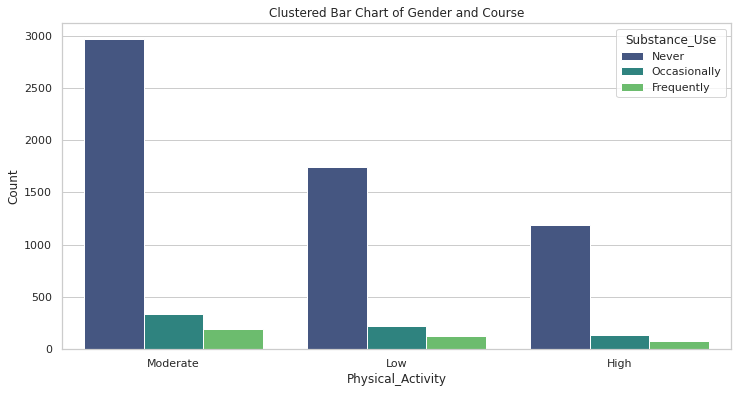

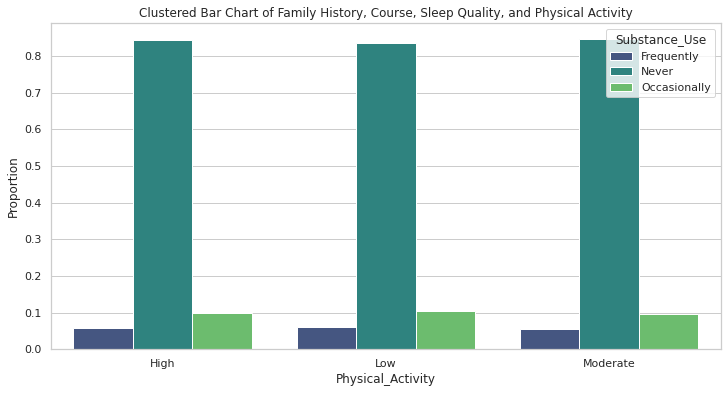

In [48]:
# Sleep Quality and Physical Activity

plt.figure(figsize=(12, 6))
sns.countplot(x='Physical_Activity', hue='Substance_Use', data=df, palette='viridis')
plt.title('Clustered Bar Chart of Gender and Course')
plt.xlabel('Physical_Activity')
plt.ylabel('Count')
plt.legend(title='Substance_Use')
plt.show()


# Calculate proportions for each combination of 'Family_History' and 'Course'
normalized_data = df.groupby(['Physical_Activity', 'Substance_Use']).size() / df.groupby(['Physical_Activity']).size()

# Reshape the data to create a DataFrame suitable for Seaborn
normalized_data = normalized_data.reset_index(name='Proportion')

# Sleep Quality and Physical Activity
plt.figure(figsize=(12, 6))
sns.barplot(x='Physical_Activity', y='Proportion', hue='Substance_Use', data=normalized_data, palette='viridis')
plt.title('Clustered Bar Chart of Family History, Course, Sleep Quality, and Physical Activity')
plt.xlabel('Physical_Activity')
plt.ylabel('Proportion')
plt.legend(title='Substance_Use')
plt.show()

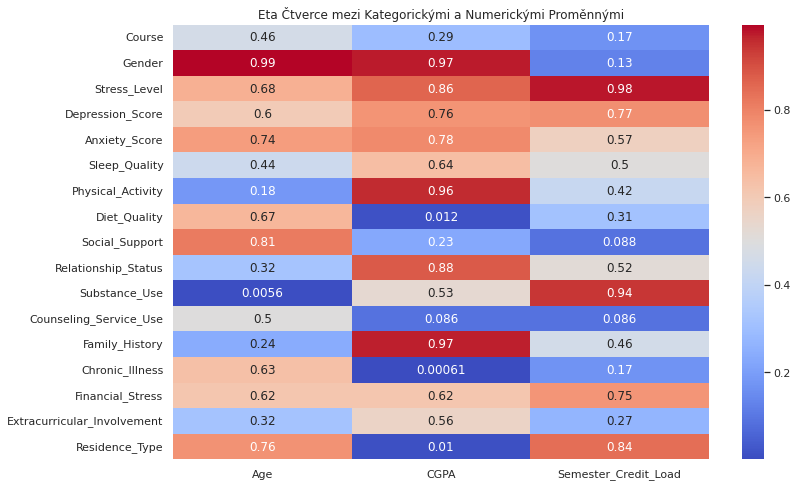

In [30]:
from sklearn.feature_selection import f_classif

df = df.dropna()

def eta_squared(X, y):
    """ Výpočet Eta čtverce pro vztah mezi kategorickou a numerickou proměnnou. """
    anova = f_classif(X, y)
    eta_sq = anova[0] / (anova[0] + anova[1])
    return eta_sq

# categorical_cols = df.select_dtypes(include=['object']).columns
# # Výběr numerických sloupců
# numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Vytvoření DataFrame pro výsledky Eta čtverce
eta_squared_results = pd.DataFrame(index=categorical_attributes, columns=numerical_attributes)

# Výpočet Eta čtverce pro každou kombinaci kategorických a numerických sloupců
for cat_col in categorical_attributes:
    for num_col in numerical_attributes:
        eta_sq = eta_squared(df[[num_col]], df[cat_col])
        eta_squared_results.loc[cat_col, num_col] = eta_sq[0]

# Vizualizace výsledků
plt.figure(figsize=(12, 8))
sns.heatmap(eta_squared_results.astype(float), annot=True, cmap='coolwarm')
plt.title('Eta Čtverce mezi Kategorickými a Numerickými Proměnnými')
plt.show()

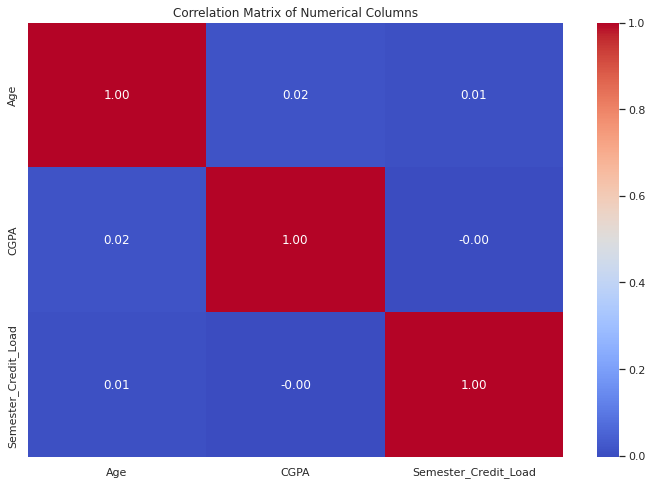

In [31]:
# Selecting numerical columns for correlation analysis
numerical_data = df[kvantitative_attributes]

# Calculating the correlation matrix
# Pearson (kvantitative attributes)
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

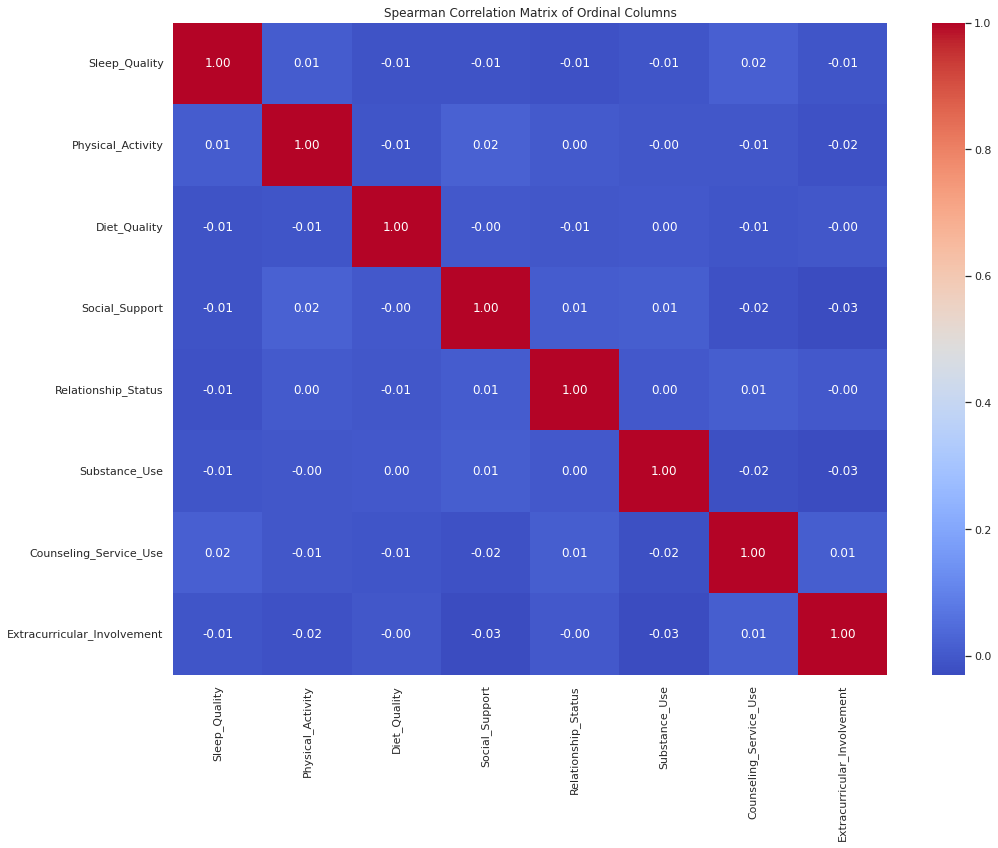

In [32]:
# Selecting only the columns that can be considered as ordinal
ordinal_columns = ['Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 
                   'Social_Support', 'Relationship_Status', 'Substance_Use', 
                   'Counseling_Service_Use', 'Extracurricular_Involvement']

# Encoding the ordinal columns as numerical values for correlation analysis
# Assuming the levels in the ordinal columns have a natural order
ordinal_data = df[ordinal_columns].apply(lambda x: x.astype("category").cat.codes)

# Calculating Spearman correlation matrix for the ordinal columns
spearman_correlation_matrix = ordinal_data.corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Spearman Correlation Matrix of Ordinal Columns")
plt.show()

Ted vytvorime grafy pro pary s vysokou hodnotou korelace

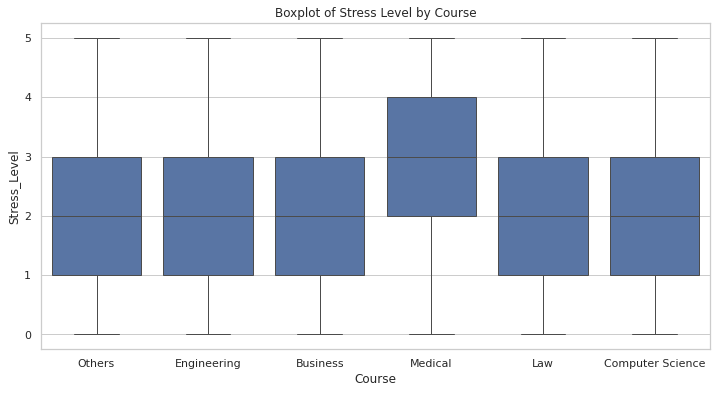

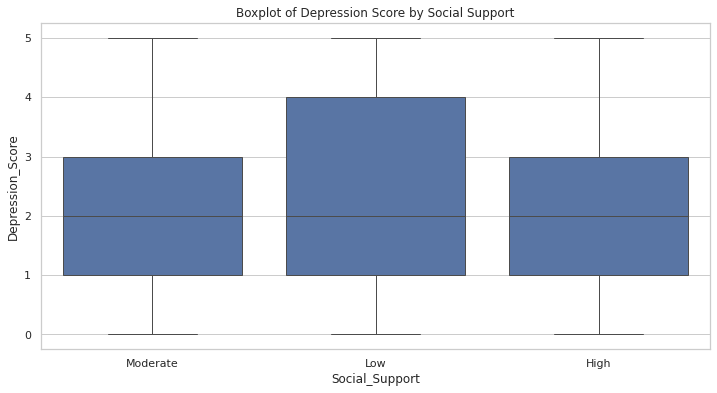

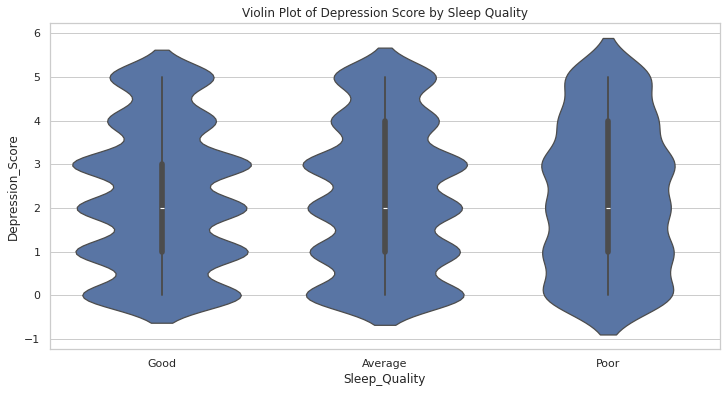

/tmp/ipykernel_74742/3981973333.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Stress_Level', data=average_stress_by_age, palette='viridis', edgecolor="k")


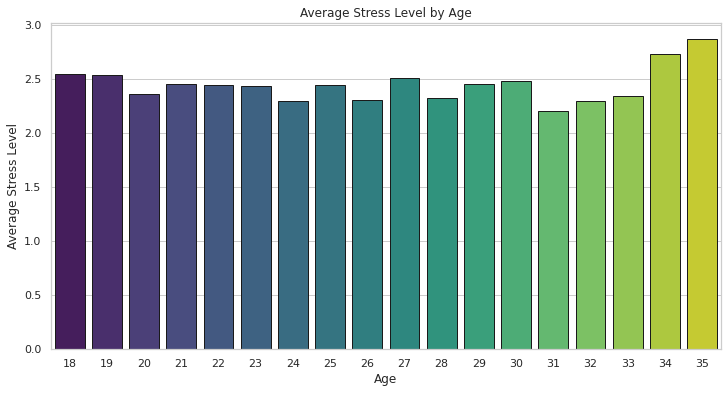

/tmp/ipykernel_74742/3981973333.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Stress_Level', data=median_stress_by_age, palette='viridis', edgecolor="k")


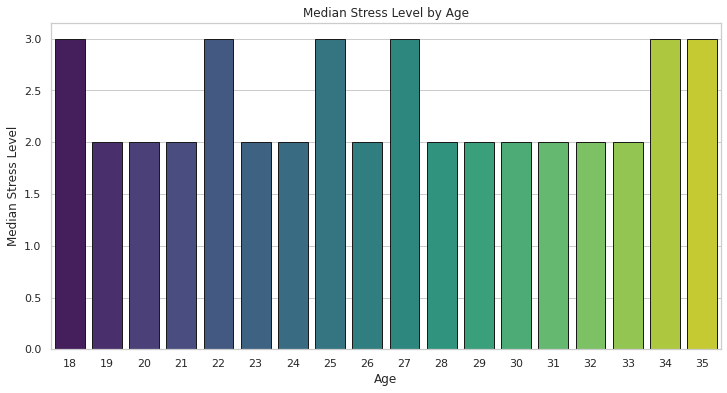

In [33]:
# Plotting a boxplot for 'Course' and 'Stress_Level'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='Stress_Level', data=df)
plt.title("Boxplot of Stress Level by Course")
plt.show()
# Plotting a boxplot for 'Social_Support' and 'Depression_Score'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Social_Support', y='Depression_Score', data=df)
plt.title("Boxplot of Depression Score by Social Support")
plt.show()
# Plotting a violin plot for 'Sleep_Quality' and 'Depression_Score'
plt.figure(figsize=(12, 6))
sns.violinplot(x='Sleep_Quality', y='Depression_Score', data=df)
plt.title("Violin Plot of Depression Score by Sleep Quality")
plt.show()
# Calculating the average stress level for each age
average_stress_by_age = df.groupby('Age')['Stress_Level'].mean().reset_index()

# Plotting the histogram of average stress level for each age
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Stress_Level', data=average_stress_by_age, palette='viridis', edgecolor="k")
plt.title("Average Stress Level by Age")
plt.xlabel("Age")
plt.ylabel("Average Stress Level")
plt.show()
# Calculating the median stress level for each age
median_stress_by_age = df.groupby('Age')['Stress_Level'].median().reset_index()

# Plotting the histogram of median stress level for each age
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Stress_Level', data=median_stress_by_age, palette='viridis', edgecolor="k")
plt.title("Median Stress Level by Age")
plt.xlabel("Age")
plt.ylabel("Median Stress Level")
plt.show()

Grafy na odhaleni outlieru

In [34]:
# Plotting histograms for all numerical columns to identify outliers
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=True, edgecolor="k")
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

NameError: name 'numerical_columns' is not defined

Box plot na odhaleni utlineru numerickych hodnot

In [ ]:
# Plotting boxplots for all numerical columns to further identify outliers
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## 2. část

V rámci přípravy datové sady proveďte následující kroky:

- z datové sady odstraňte atributy, které jsou pro danou dolovací úlohu irelevantní
- v datové sadě, pokud možno, ponechte:
    - kategorické,
    - numerické atributy,
    - atributy s chybějícími hodnotami a
    - atributy s odlehlými hodnotami (pokud je původní datová sada obsahuje)
- vypořádejte se s chybějícími hodnotami.
    - pro odstranění těchto hodnot využijte alespoň dvě různé metody pro odstranění chybějících hodnot
- vypořádejte se s odlehlými hodnotami, jsou-li v datové sadě přítomny

Dolovací úloha: klasifikace úrovně stresu/deprese/úzkosti na základě ostatních vhodných atributů.

Z datové sady je možné odstranit následující atributy:

Pro dolovací úlohu jsou relevantní atributy:  
- Stress_Level  
- Depression_Level  
- Anxiety_Level (jeden z nich)  
a dále:  

-   

### Odstranění irelevantních atributů z datové sady
- ponechat kategorické, numerické, chybějící hodnoty

### Doplnění chybějících hodnot do datové sady

### Odlehlé hodnoty 
- nejsou - není potřeba nic odstraňovat

### 1. varianta - diskretizace kvantitativních atributů

- diskretizace atributů Age, CGPA a Semester_Credit_Load (alespoň jeden z nich potřebujeme nechat v sadě - ideálně CGPA, ať to máme pořádně na čem demostrovat)
- plnění (binning) - rozdělení hodnot na intervaly (po analýze histogramu např.)


### 2. varianta - transformace kategorických atributů na numerické, normalizace kvantitativních atributů

- potřebujeme převést Stress_Level nebo Depression_Score nebo něco takového rozhodně
- dál např. Course, Physical_Activity, Sleep_Quality, Diet_Quality
- nektere atributy mame ordinalni, nektere ne - napr. Course neni ordinalni (je to nominalni I think), ale sleep quality je ordinalni
- nejvíce hodnot má asi atribut Course
- moznosti:
    - rucne priradime ordinalni mapovani hodnot - asi nejlepsi moznost pro ordinalni atributy, vzhledem k tomu, ze mame malo hodnot pro kazdy ten atribut: 

In [67]:
diet_quality_ordinal_mapping = {'Poor': 0, 'Average': 1, 'Good': 2}
transformed_df = df.copy() #!!! bad bcs je to reference!!!

print("DF")
print(df)
print("transDF")
print(transformed_df)
transformed_df['Diet_Quality'] = df['Diet_Quality'].map(diet_quality_ordinal_mapping)
print("DF")
print(df)
print("transDF")
print(transformed_df)

DF
      Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0      25            Others    Male  3.56             3                 3   
1      24       Engineering  Female  2.44             0                 3   
2      19          Business  Female  3.74             4                 0   
3      19  Computer Science    Male  3.65             2                 1   
4      18          Business    Male  3.40             3                 3   
...   ...               ...     ...   ...           ...               ...   
7017   20               Law  Female  3.69             3                 1   
7018   24           Medical  Female  3.73             3                 4   
7019   26            Others    Male  3.65             4                 5   
7020   24           Medical    Male  3.65             4                 3   
7021   22           Medical  Female   NaN             3                 5   

      Anxiety_Score Sleep_Quality Physical_Activity Diet_Quality  \
0   

    - label encoding (vytvori to ale ordinalni usporadani - not good, pokud chceme zachovat ordinalni usporadani, pouzijme rucni encoding, pokud tam nechceme usporadani, labelEncoding ho tam zanese -> nepouzivat!)

In [61]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df_label_encoding = df

# print(df_label_encoding)
# df_label_encoding['Course'] = label_encoder.fit_transform(df['Course'])
# print(df_label_encoding)


    - one-hot encoding - pro neordinalni atributy good, vytvori to sloupecky s 0 a 1 (prip. True a False) napr. pro kazdy typ kurzu - vzhledem k tomu, ze mame vsude malo hodnot, je to fajne:

In [74]:
df_one_hot = df.copy()
print(df_one_hot)
df_one_hot = pd.get_dummies(df_one_hot, columns=['Course'], prefix='Course')
print(df_one_hot)

      Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0      25            Others    Male  3.56             3                 3   
1      24       Engineering  Female  2.44             0                 3   
2      19          Business  Female  3.74             4                 0   
3      19  Computer Science    Male  3.65             2                 1   
4      18          Business    Male  3.40             3                 3   
...   ...               ...     ...   ...           ...               ...   
7017   20               Law  Female  3.69             3                 1   
7018   24           Medical  Female  3.73             3                 4   
7019   26            Others    Male  3.65             4                 5   
7020   24           Medical    Male  3.65             4                 3   
7021   22           Medical  Female   NaN             3                 5   

      Anxiety_Score Sleep_Quality Physical_Activity Diet_Quality  \
0      

In [76]:
import pandas as pd


print(df)

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame

# Select the column to one-hot encode
column_to_encode = 'Course'

# Check if the column exists in the DataFrame
if column_to_encode in df.columns:
    # Use pd.factorize to get codes and unique values
    codes, unique_values = pd.factorize(df[column_to_encode])

    # Create a DataFrame with 0 and 1 values
    one_hot_df = pd.DataFrame(columns=[f'{column_to_encode}_{value}' for value in unique_values],
                               data=(codes[:, None] == range(len(unique_values))).astype(int))

    # Concatenate the new DataFrame with the original DataFrame
    df = pd.concat([df, one_hot_df], axis=1)

    # Drop the original column that was one-hot encoded
    df = df.drop(column_to_encode, axis=1)
else:
    print(f"Column '{column_to_encode}' not found in the DataFrame.")


      Age  Gender  CGPA  Stress_Level  Depression_Score  Anxiety_Score  \
0      25    Male  3.56             3                 3              2   
1      24  Female  2.44             0                 3              0   
2      19  Female  3.74             4                 0              3   
3      19    Male  3.65             2                 1              0   
4      18    Male  3.40             3                 3              4   
...   ...     ...   ...           ...               ...            ...   
7017   20  Female  3.69             3                 1              5   
7018   24  Female  3.73             3                 4              1   
7019   26    Male  3.65             4                 5              1   
7020   24    Male  3.65             4                 3              4   
7021   22  Female   NaN             3                 5              0   

     Sleep_Quality Physical_Activity Diet_Quality Social_Support  ...  \
0             Good          Moderate  

Dale provedte normalizaci kvantitativnich atributu, pro ktere to ma smysl

- napr 